## **Goal**


The primary goal of this project is to apply clustering techniques to analyze a dataset containing cinema ticket sales data. By leveraging clustering algorithms, we aim to uncover hidden patterns or groupings that can help stakeholders, such as cinema operators and movie distributors, make informed decisions. This analysis can reveal insights into customer behavior, cinema performance, ticket pricing strategies, and capacity utilization, as well as identify outliers for further investigation.

Specific Objectives
Cinema Performance Grouping:

Goal: Group cinemas based on performance metrics, such as total sales, tickets sold, occupancy rates, and showtimes.
Purpose: Identify cinemas with similar attendance patterns or financial performance, which could help cinema chains optimize their operations by understanding regional or demographic differences in cinema-going behavior.
Time-based Grouping:

Goal: Cluster cinemas or specific showings based on time variables (e.g., date, month, quarter).
Purpose: Identify trends in cinema attendance that are influenced by specific time periods, such as peak cinema seasons or day-of-the-week patterns, which can be valuable for promotional campaigns or resource allocation (e.g., adjusting ticket prices or scheduling showings).
Ticket Price and Capacity Optimization:

Goal: Cluster cinemas based on pricing strategies, ticket sales, capacity, and usage (e.g., how well capacity is utilized).
Purpose: Optimize pricing strategies and capacity usage by grouping cinemas with similar characteristics. This could help cinema operators adjust ticket prices dynamically, ensuring higher occupancy and revenue maximization.
Customer Behavior Segmentation:

Goal: Cluster cinemas or showings based on customer behavior metrics such as tickets sold, occupancy percentage, showtime preferences, and film characteristics.
Purpose: Gain insights into customer preferences, such as which types of films attract more viewers during specific times of the day, or how different pricing strategies impact attendance. This information can be used to personalize marketing efforts or schedule screenings more effectively.
Outlier Detection:

Goal: Identify cinemas or showings that exhibit abnormal behavior, such as unusually high or low sales, or irregular occupancy rates.
Purpose: Detect potential issues or outliers that may require further investigation, such as operational inefficiencies, pricing anomalies, or opportunities for improvement in underperforming cinemas.
Project Roadmap
Data Preprocessing:

Load the dataset from Kaggle.
Handle missing values, outliers, and normalize the data where necessary.
Perform feature engineering, such as creating additional time-based features (e.g., weekend indicator, holiday indicator), calculating relevant metrics (e.g., revenue per seat), or transforming categorical variables (e.g., cinema location, film genre).
Exploratory Data Analysis (EDA):

Conduct an in-depth analysis of the dataset to understand key patterns and relationships between features.
Visualize important metrics such as sales trends over time, cinema occupancy rates, and customer behavior patterns.
Clustering Methodologies:

Apply various clustering algorithms, including but not limited to:
K-Means Clustering: A popular partitioning method to create groups based on numerical features like sales and occupancy rates.
Hierarchical Clustering: A method that creates a hierarchy of clusters, which could be useful for visualizing the relationships between cinemas or customer behavior.
DBSCAN: A density-based clustering algorithm for detecting outliers or noise in the dataset.
Gaussian Mixture Models (GMM): A probabilistic model that could help identify more flexible clusters, considering the potential overlap between groups.
Cluster Evaluation:

Evaluate the clustering results using internal validation metrics such as the Silhouette Score, Davies-Bouldin Index, and Elbow Method.
For time-based clusters, analyze how well the clustering reflects trends in attendance across different months or quarters.
Insights and Recommendations:

Based on the clustering results, derive actionable insights related to cinema performance, pricing strategies, and customer segmentation.
Suggest practical recommendations, such as optimizing cinema scheduling, revising ticket pricing strategies, or targeting specific customer segments with tailored marketing campaigns.
Conclusion and Future Work:

Summarize the key findings from the clustering analysis.
Discuss potential improvements, such as incorporating external factors (e.g., public holidays, film genres), testing more advanced clustering methods (e.g., fuzzy clustering), or applying the analysis to a larger, more diverse dataset.

# Dataset Specification:



The provided dataset represents cinema ticket sales data, likely used for clustering analyses, such as finding patterns in cinema performance, ticket pricing, or audience behavior. Here's an explanation of the columns:

**film_code**:Unique identifier for the film.

**cinema_code**: Unique identifier for the cinema where the film is shown.

**total_sales**: Total revenue generated from ticket sales for the particular film in that cinema.

**tickets_sold**: Total number of tickets sold.

**tickets_out**: Tickets that were reserved but not sold (assumed as unsold tickets).

**show_time**: Number of showtimes or screenings for that day.

**occu_perc**: Occupancy percentage, showing how full the cinema was relative to its total capacity.

**ticket_price**: Price of one ticket for that show.

**ticket_use**: Total number of tickets used (likely the number of attendees).

**capacity**: Total seating capacity of the cinema.

**date**: Date of the screening.

**month**: Month of the screening.

**quarter**: Quarter of the year (e.g., Q1 = Jan-March, Q2 = April-June).

**day**: Day of the month for the screening.



. This dataset is ideal for clustering algorithms like K-Means or hierarchical clustering to group similar data points based on multiple features.

# Kaggle API initialization

We are importing the dataset from kaggle here to performe the necessary takes on it.

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amirhosseinh4860","key":"efda400e2ecca1bae6f619f2b522b678"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

# Downloading dataset

In [ ]:
! kaggle datasets download -d arashnic/cinema-ticket

Dataset URL: https://www.kaggle.com/datasets/arashnic/cinema-ticket
License(s): CC-BY-NC-SA-4.0
  0% 0.00/3.27M [00:00<?, ?B/s]
100% 3.27M/3.27M [00:00<00:00, 189MB/s]


In [ ]:
! unzip /content/cinema-ticket.zip

Archive:  /content/cinema-ticket.zip
  inflating: cinemaTicket_Ref.csv    


# Data Analysis

In order to make any decision related to Data, we need to see and analyze our data. We will be doing just that here, then we will get to doing the actual Machine Learning.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation of Libraries

The code snippet in the image imports the following essential Python libraries commonly used for data analysis and visualization:

**pandas** (pd) :  A powerful library for data manipulation and analysis, especially for handling structured data (e.g., DataFrames).

**numpy** (np) :  Used for numerical computations, especially for handling arrays and performing mathematical operations efficiently.

**matplotlib.pyplot** (plt) :  A popular plotting library for creating static, animated, and interactive visualizations.

**seaborn** (sns) : Built on top of matplotlib, seaborn makes it easier to create more attractive and informative statistical plots.

These libraries are often used together for data science tasks, such as data visualization, exploration, and manipulation.

# Data Initialization

The pd.read_csv() function reads the dataset (cinemaTicket_Ref.csv) from the specified file path into a pandas DataFrame. This function automatically parses the CSV file into a structured DataFrame.
The pd.DataFrame(data) is used to explicitly convert the data into a DataFrame format, although this is optional since read_csv directly returns a DataFrame. It’s good practice to confirm that the data is structured properly.


In [ ]:
data = pd.read_csv('/content/cinemaTicket_Ref.csv')
df = pd.DataFrame(data)

In [ ]:
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


As you see we have 142524 rows and 14 fitures(columns) here.

In [ ]:
df.shape

(142524, 14)

The .iloc[] function is used to slice the DataFrame, selecting only the first 800 rows of data. The : after the comma indicates that all columns are included. This is likely done to reduce the dataset size for quicker processing during initial exploration.

In [ ]:
df = df.iloc[:800, :]

In [ ]:
# df.shape

df.describe() provides summary statistics for the numerical columns in the DataFrame. It includes metrics like mean, standard deviation, min/max, and percentiles. This is an essential part of exploratory data analysis (EDA) to understand the distribution of the data.

In [ ]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,800.0,800.000000,8.000000e+02,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000
mean,1492.0,318.088750,1.660131e+06,20.51625,0.031250,2.637500,11.951900,79636.906382,20.48500,475.735740,5.707500,2.111250,16.100000
std,0.0,152.019607,2.361884e+06,24.89170,0.283503,1.448695,17.367007,34374.731142,24.87314,534.144442,0.685588,0.314638,9.248347
min,1492.0,39.000000,3.500000e+04,1.00000,0.000000,1.000000,0.110000,25000.000000,1.00000,10.000000,5.000000,2.000000,1.000000
25%,1492.0,201.000000,4.200000e+05,6.00000,0.000000,1.750000,1.547500,53810.541311,6.00000,119.094364,5.000000,2.000000,8.000000
50%,1492.0,310.000000,9.000000e+05,12.00000,0.000000,3.000000,4.540000,80000.000000,12.00000,299.700599,6.000000,2.000000,17.000000
75%,1492.0,474.000000,1.770000e+06,26.00000,0.000000,3.000000,14.755000,88417.849899,26.00000,611.394558,6.000000,2.000000,24.000000
max,1492.0,537.000000,1.800000e+07,226.00000,4.000000,8.000000,100.000000,150000.000000,226.00000,2500.000000,8.000000,3.000000,31.000000


df.info() provides a concise summary of the DataFrame, including the number of non-null values, data types of each column, and memory usage. It is helpful for quickly understanding the structure of the dataset and identifying any columns that might need preprocessing (e.g., missing values, incorrect data types).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   film_code     800 non-null    int64  
 1   cinema_code   800 non-null    int64  
 2   total_sales   800 non-null    int64  
 3   tickets_sold  800 non-null    int64  
 4   tickets_out   800 non-null    int64  
 5   show_time     800 non-null    int64  
 6   occu_perc     800 non-null    float64
 7   ticket_price  800 non-null    float64
 8   ticket_use    800 non-null    int64  
 9   capacity      800 non-null    float64
 10  date          800 non-null    object 
 11  month         800 non-null    int64  
 12  quarter       800 non-null    int64  
 13  day           800 non-null    int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 87.6+ KB


This line checks for missing values (NaN values) in the DataFrame by column. isna() returns a DataFrame of boolean values where True indicates a missing value, and sum() aggregates the number of missing values for each column. This is important for identifying columns that may require handling for missing data.

In [ ]:
df.isna().sum()

,0
film_code,0
cinema_code,0
total_sales,0
tickets_sold,0
tickets_out,0
show_time,0
occu_perc,0
ticket_price,0
ticket_use,0
capacity,0


This command removes any duplicate rows in the DataFrame. The inplace=True argument ensures that the operation modifies the DataFrame directly, without returning a new copy. Removing duplicates is a key data cleaning step to avoid bias in clustering or other machine learning models due to repeated data points.

In [ ]:
df.drop_duplicates(inplace=True)

<ipython-input-7-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


This block converts the date column to datetime format and the categorical columns (film_code, cinema_code, day, quarter, and month) to Categorical data type.
pd.to_datetime(): This ensures that the date column is treated as a date type, which is useful for time-based analyses or sorting.
pd.Categorical(): Converting these columns to categorical types improves memory efficiency and helps algorithms recognize them as discrete categories rather than numerical values. This also facilitates better performance in machine learning models that handle categorical data.


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['film_code'] = pd.Categorical(df['film_code'])
df['cinema_code'] = pd.Categorical(df['cinema_code'])
df['day'] = pd.Categorical(df['day'])
df['quarter'] = pd.Categorical(df['quarter'])
df['month'] = pd.Categorical(df['month'])

<ipython-input-8-24d3e17acd4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-8-24d3e17acd4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['film_code'] = pd.Categorical(df['film_code'])
<ipython-input-8-24d3e17acd4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   film_code     800 non-null    category      
 1   cinema_code   800 non-null    category      
 2   total_sales   800 non-null    int64         
 3   tickets_sold  800 non-null    int64         
 4   tickets_out   800 non-null    int64         
 5   show_time     800 non-null    int64         
 6   occu_perc     800 non-null    float64       
 7   ticket_price  800 non-null    float64       
 8   ticket_use    800 non-null    int64         
 9   capacity      800 non-null    float64       
 10  date          800 non-null    datetime64[ns]
 11  month         800 non-null    category      
 12  quarter       800 non-null    category      
 13  day           800 non-null    category      
dtypes: category(5), datetime64[ns](1), float64(3), int64(5)
memory usage: 64.6 KB


This cell checks if missing values for the column occu_perc (occupancy percentage) are concentrated in specific cinemas or dates.
The code filters the DataFrame to return only rows where occu_perc is missing (NaN).
This is a useful exploration step to determine if missing data is tied to specific conditions (e.g., certain cinemas might have incomplete data), which could require different handling strategies.

In [ ]:
missing_data = df[df['occu_perc'].isna()]

missing_data

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day


This command removes any rows from the DataFrame that contain missing values (NaN). The inplace=True argument ensures that the changes are applied directly to df.
Dropping missing data is a common preprocessing step, especially when the proportion of missing data is small, and imputing missing values may not be necessary or feasible.

In [ ]:
df.dropna(inplace=True)

<ipython-input-9-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


# Visuallization

What is a Pairplot?
A pairplot is a powerful visualization tool in data analysis, particularly for exploratory data analysis (EDA). It provides a grid of plots showing pairwise relationships between features (columns) in the dataset, while also providing histograms or density plots on the diagonal for each feature’s distribution. In simple terms, it gives a combined view of how different variables in the dataset relate to each other through scatter plots, and also visualizes each variable's distribution individually.

Diagonal: Each cell on the diagonal represents the distribution of a single feature. It can be displayed as a histogram or kernel density estimate (KDE) plot, helping us understand the spread or skewness of each variable.
Off-diagonal plots: These scatter plots show the relationships between every possible pair of variables. If a pattern or relationship (e.g., linear correlation) exists, it can be identified here.
Hue: In your plot, the color scale (intensity of the points) likely represents the total_sales, with darker points indicating higher values and lighter ones indicating lower values.

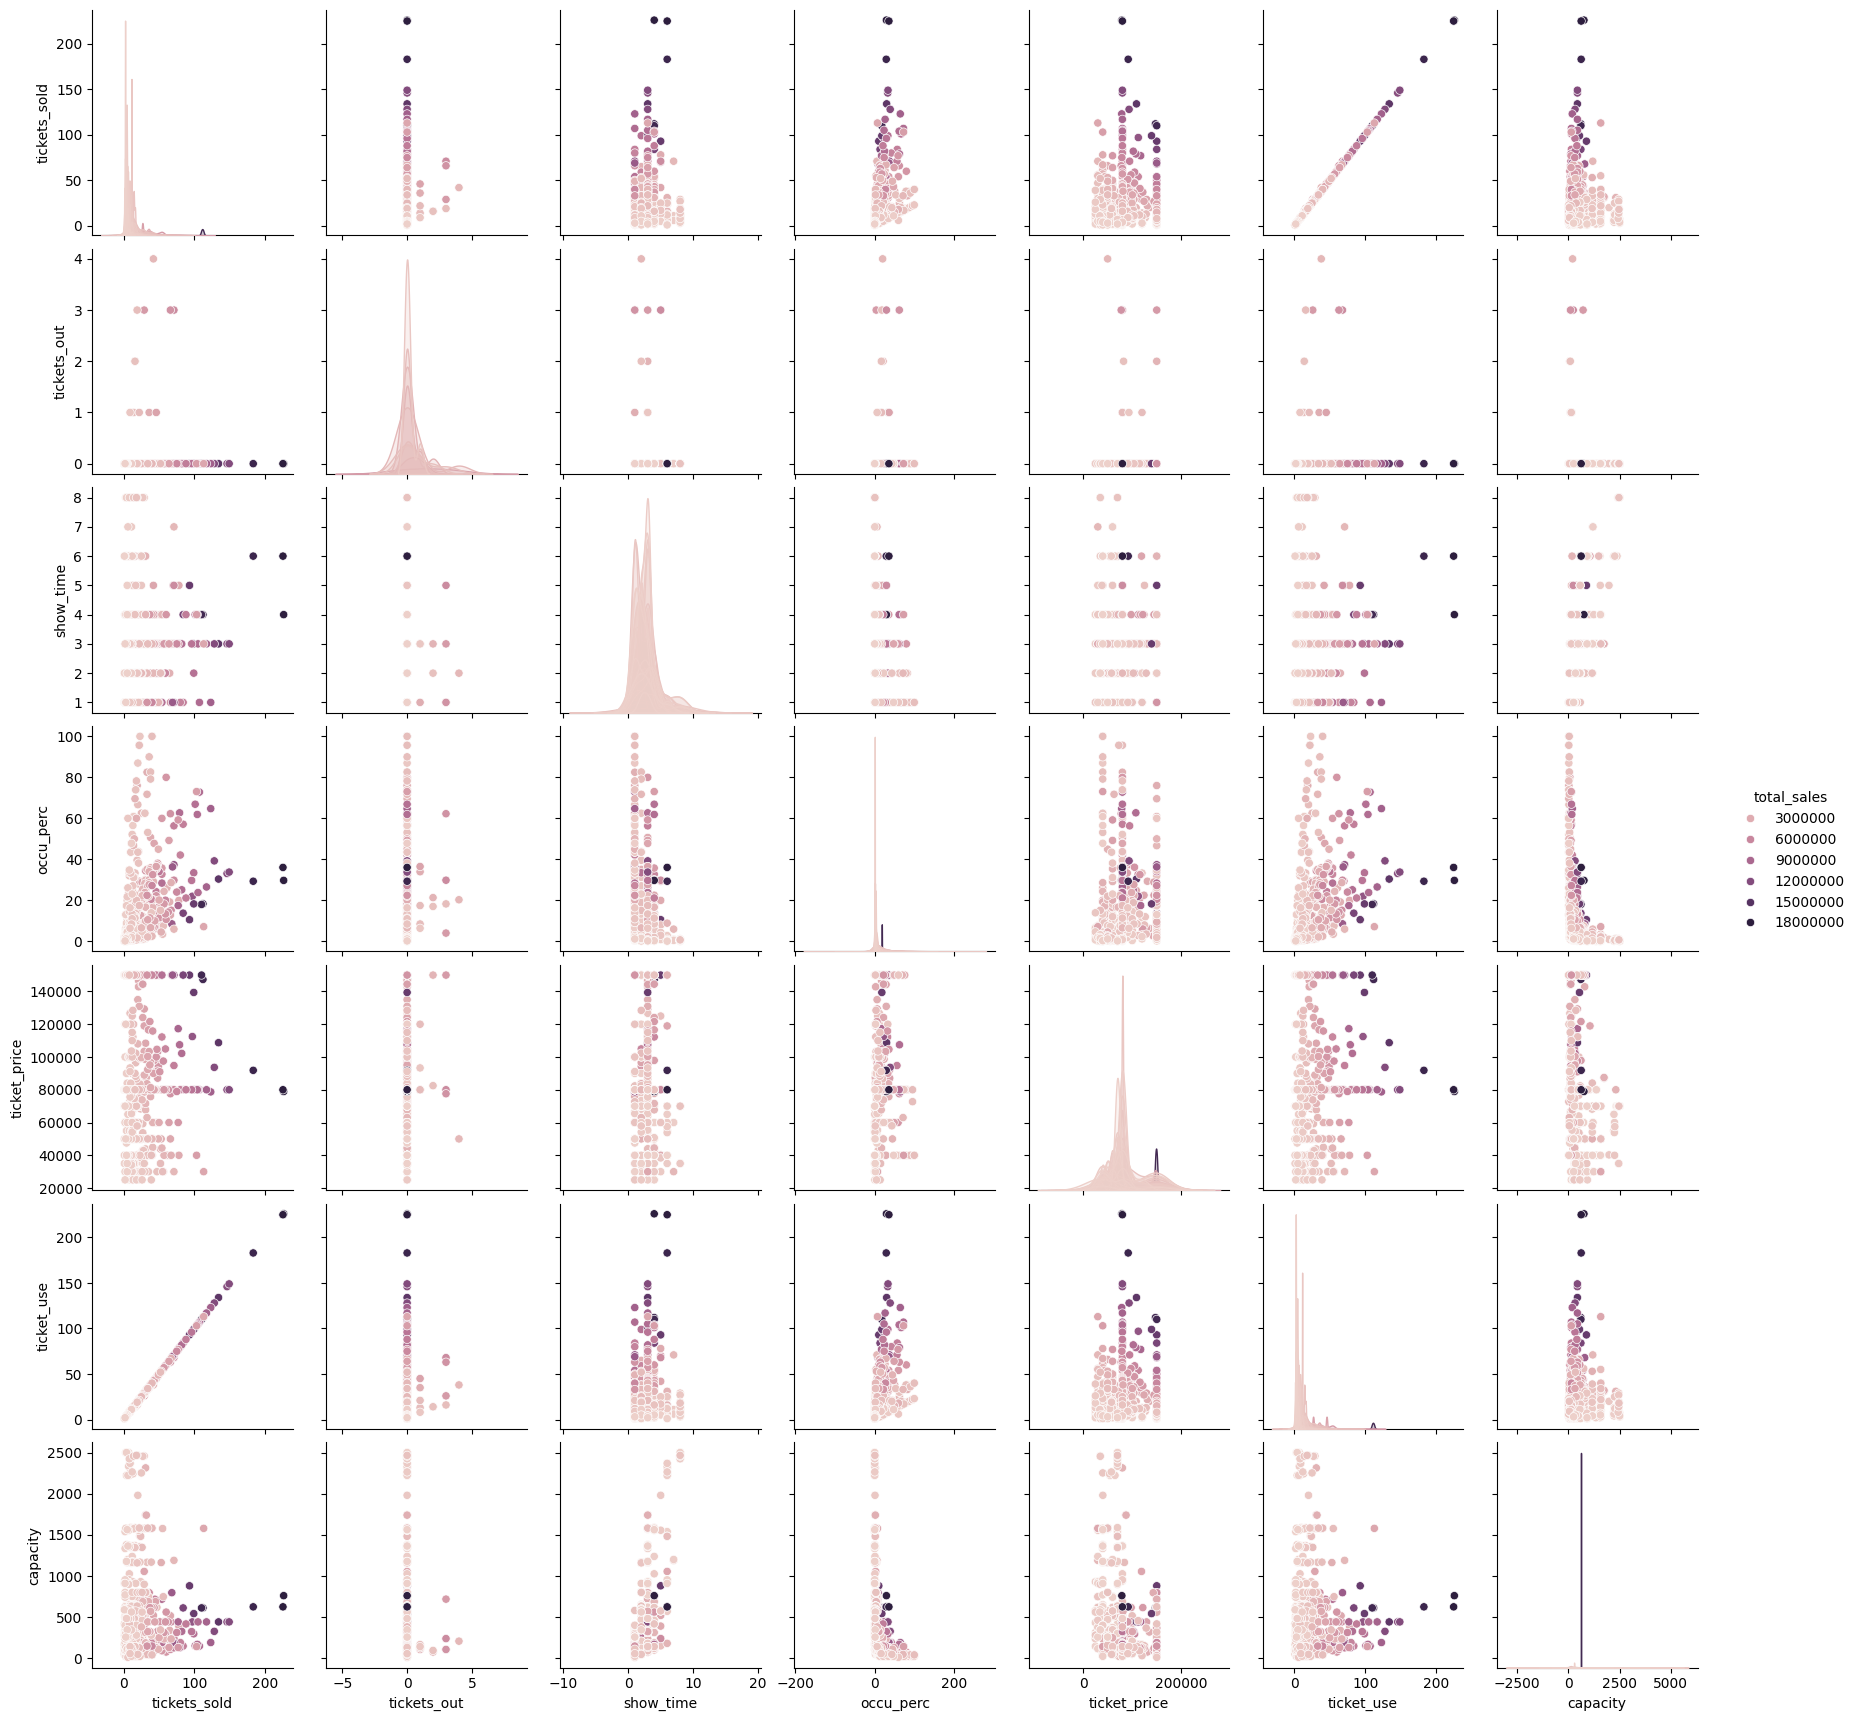

In [ ]:
sns.pairplot(df, hue='total_sales')
plt.savefig('pairplot.png')
plt.show()

Analysis of the Pairplot for Your Dataset
The following are some key observations and interpretations from the pairplot you provided:

Tickets Sold vs Total Sales:

There is a clear positive correlation between tickets_sold and total_sales (as expected). Higher ticket sales directly lead to higher total sales.
This relationship can be seen in the scatter plot where darker points (indicating higher sales) are aligned along a diagonal path, indicating that the variables are strongly related.
Tickets Sold vs Occupancy Percentage (occu_perc):

There seems to be a positive relationship between the number of tickets sold and the occupancy percentage (occu_perc), but it's less linear. Higher ticket sales generally increase occupancy, but the relationship is more spread out.
Ticket Price vs Total Sales:

The relationship between ticket_price and total_sales is less clear. This suggests that high ticket prices do not necessarily guarantee higher sales. There could be other factors, such as cinema size or location, influencing total sales.
The scatter shows variability in total sales even for cinemas with similar ticket prices, indicating the need for further investigation.
Capacity vs Occupancy Percentage:

There seems to be a weaker relationship between capacity and occu_perc, meaning larger cinema capacities don’t always correlate with higher occupancy rates.
This suggests that other factors (e.g., popularity of the movie, show time, or season) might influence occupancy rates more than cinema capacity.
Tickets Sold vs Show Time:

The relationship between tickets_sold and show_time is relatively spread out, indicating no strong direct correlation. However, it’s possible that specific show times might perform better based on audience preferences (e.g., evening shows), but further analysis may be needed.
Distribution of Features:

From the diagonal plots, you can observe the distribution of individual features:
Tickets_sold: Heavily skewed with most showings selling fewer than 50 tickets.
Ticket_price: Shows a high variance, indicating cinemas have very different pricing strategies.
Total_sales: A small number of showings generate significantly higher revenue than others, which could suggest the presence of a few blockbuster films.

What are Distribution Plots (Dist Plots)?
A distribution plot (also known as a histogram with optional KDE, or Kernel Density Estimate) is used to visualize the distribution of a numerical feature in a dataset. It gives us insights into the spread, central tendency, skewness, and presence of outliers in the data.

In this case, the dist plots show the distribution of various features from your cinema dataset. These help us understand the statistical properties of the data, such as how frequently certain values occur, whether the data is skewed, and if there are common or rare occurrences within the data.

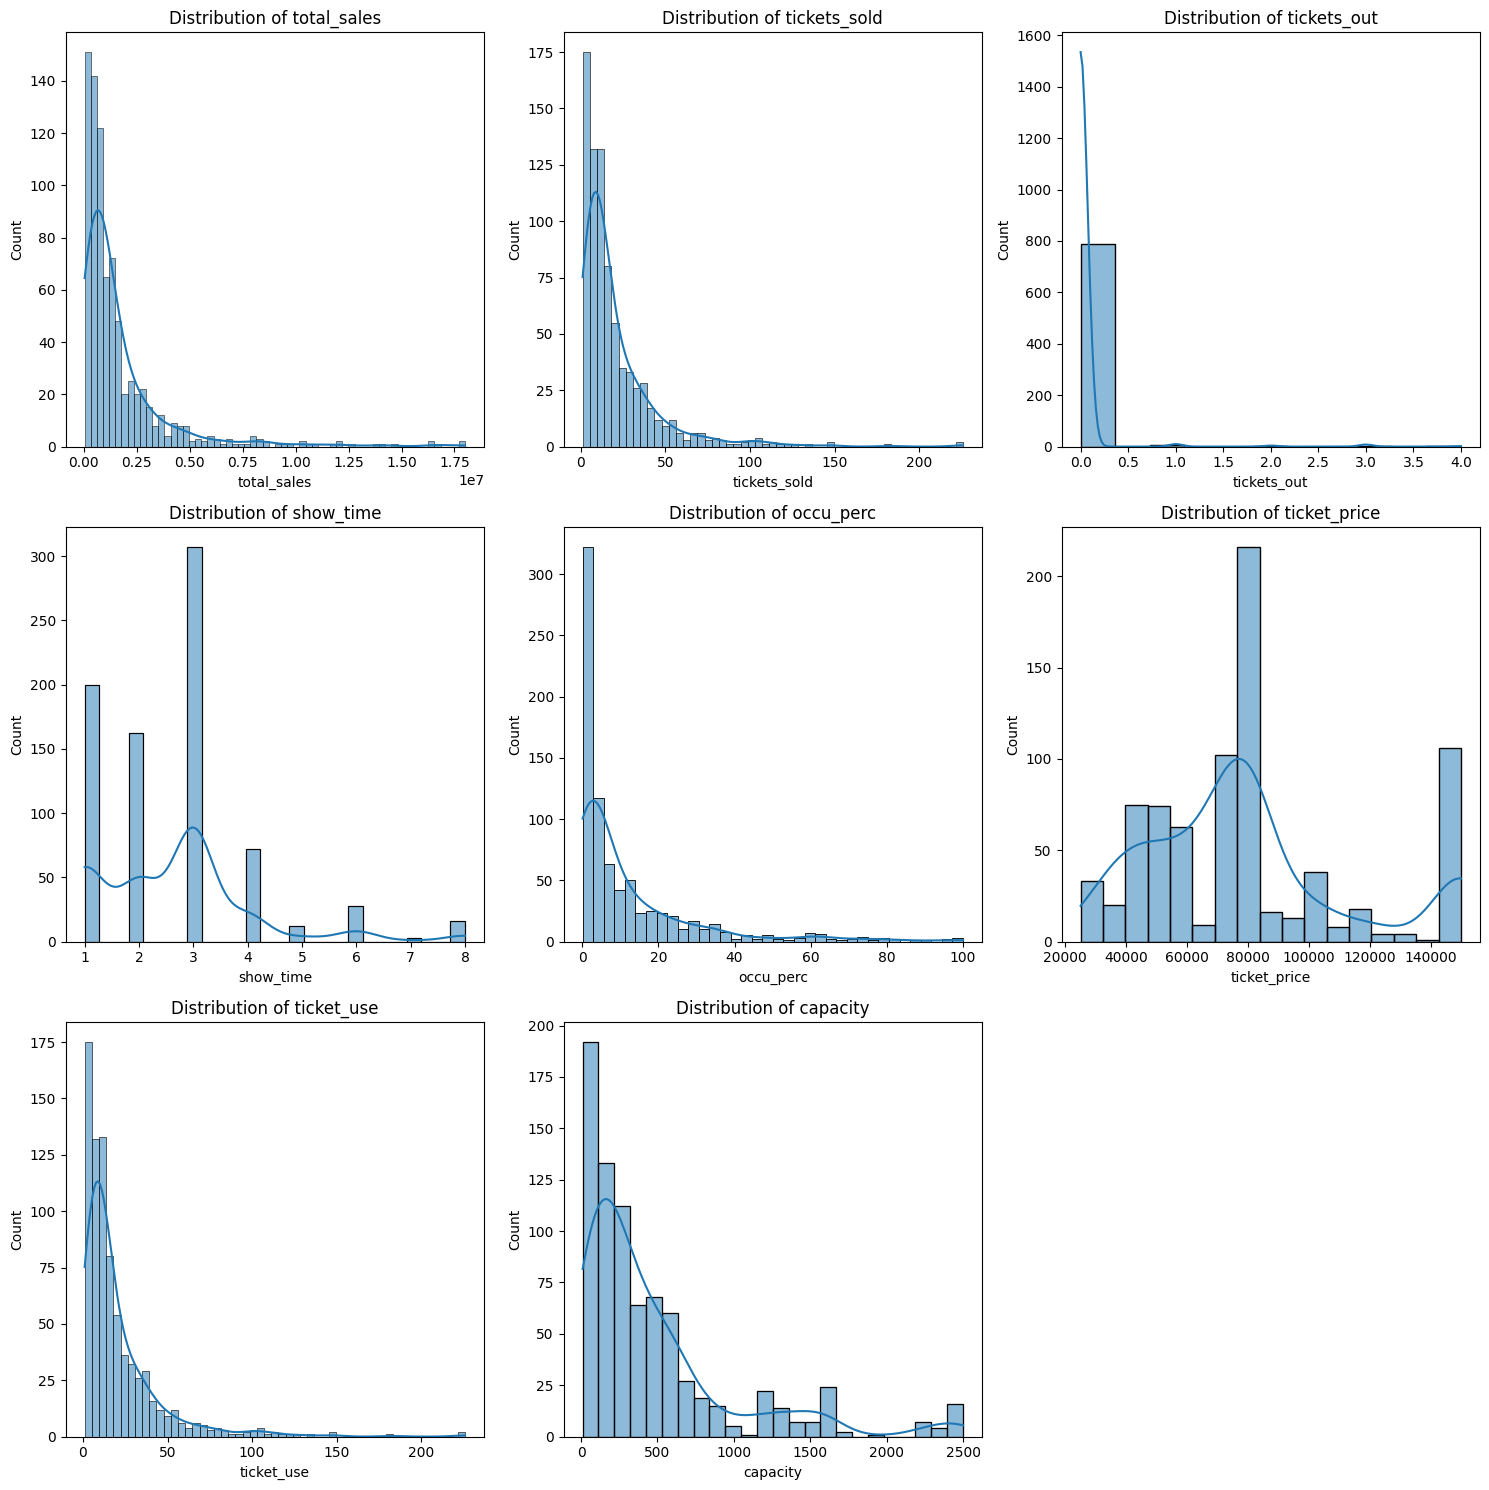

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['number']).columns

n_cols = 3

n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()

plt.savefig('numeric_columns_distribution.png')


plt.show()


Analysis of Your Distribution Plots
Total Sales (total_sales):

Distribution: This is a highly right-skewed distribution, with a majority of the cinema showings generating lower total sales, while a few outliers are generating very high sales (as indicated by the long tail on the right).
Insight: Most showings have relatively low sales, with only a few blockbuster showings significantly impacting total revenue.
Tickets Sold (tickets_sold):

Distribution: Similarly to total sales, the number of tickets sold is right-skewed. The majority of showings have fewer than 50 tickets sold, with only a few showings selling above 100 tickets.
Insight: Most cinema showings have low attendance, which suggests that cinemas either aren’t filling up or that there may be smaller-capacity theaters.
Tickets Out (tickets_out):

Distribution: The plot is extremely skewed towards zero, with the majority of the values being very low.
Insight: Most of the showings seem to have very few unsold reserved tickets. This suggests effective reservation systems or policies, but the extremely low counts could also point to incomplete data for this feature.
Show Time (show_time):

Distribution: The number of showtimes per day seems to follow a right-skewed distribution, with the majority of showings having 1 to 3 screenings per day.
Insight: The most common number of showtimes is 2 per day, with significantly fewer cinemas showing the same film more than 3 times in a single day.
Occupancy Percentage (occu_perc):

Distribution: The occupancy percentage is strongly right-skewed, with most cinemas showing occupancy below 20%. Very few showings have high occupancy rates.
Insight: Most cinemas are operating with low occupancy, indicating underutilization of capacity. Further investigation could reveal whether this is due to pricing, scheduling, or demand issues.
Ticket Price (ticket_price):

Distribution: The ticket price shows a more bimodal distribution, with two clear peaks around 70,000 to 80,000 units and 100,000 to 110,000 units. There is a significant spread of values across various price ranges.
Insight: There seem to be two common pricing strategies (likely standard and premium showings), with tickets priced around 75,000 units and 105,000 units. Pricing strategies vary significantly across cinemas or regions.
Ticket Use (ticket_use):

Distribution: This plot is right-skewed like many others, with most cinemas having low ticket usage (i.e., a low number of tickets actually used).
Insight: There is low ticket usage for the majority of showings, similar to the tickets_sold distribution. A deeper dive into customer behavior could help optimize ticket sales.
Capacity (capacity):

Distribution: This feature is also right-skewed, with most cinemas having capacities below 500 seats. A few cinemas have significantly larger capacities.
Insight: Most cinemas have smaller seating capacities, which is in line with the earlier insight regarding low ticket sales and occupancy rates. Large-capacity cinemas are rare, which may impact how sales and ticket use are distributed.

What are Box Plots?
A box plot (also known as a box-and-whisker plot) is a standardized way of displaying the distribution of data based on five summary statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It also highlights outliers in the dataset.

The plot consists of:

Box: Represents the interquartile range (IQR) between Q1 (25th percentile) and Q3 (75th percentile). The line in the middle of the box shows the median.
Whiskers: Extend from the box to the minimum and maximum values that are within 1.5 times the IQR.
Outliers: Any data points beyond the whiskers are plotted as individual points, indicating extreme values.

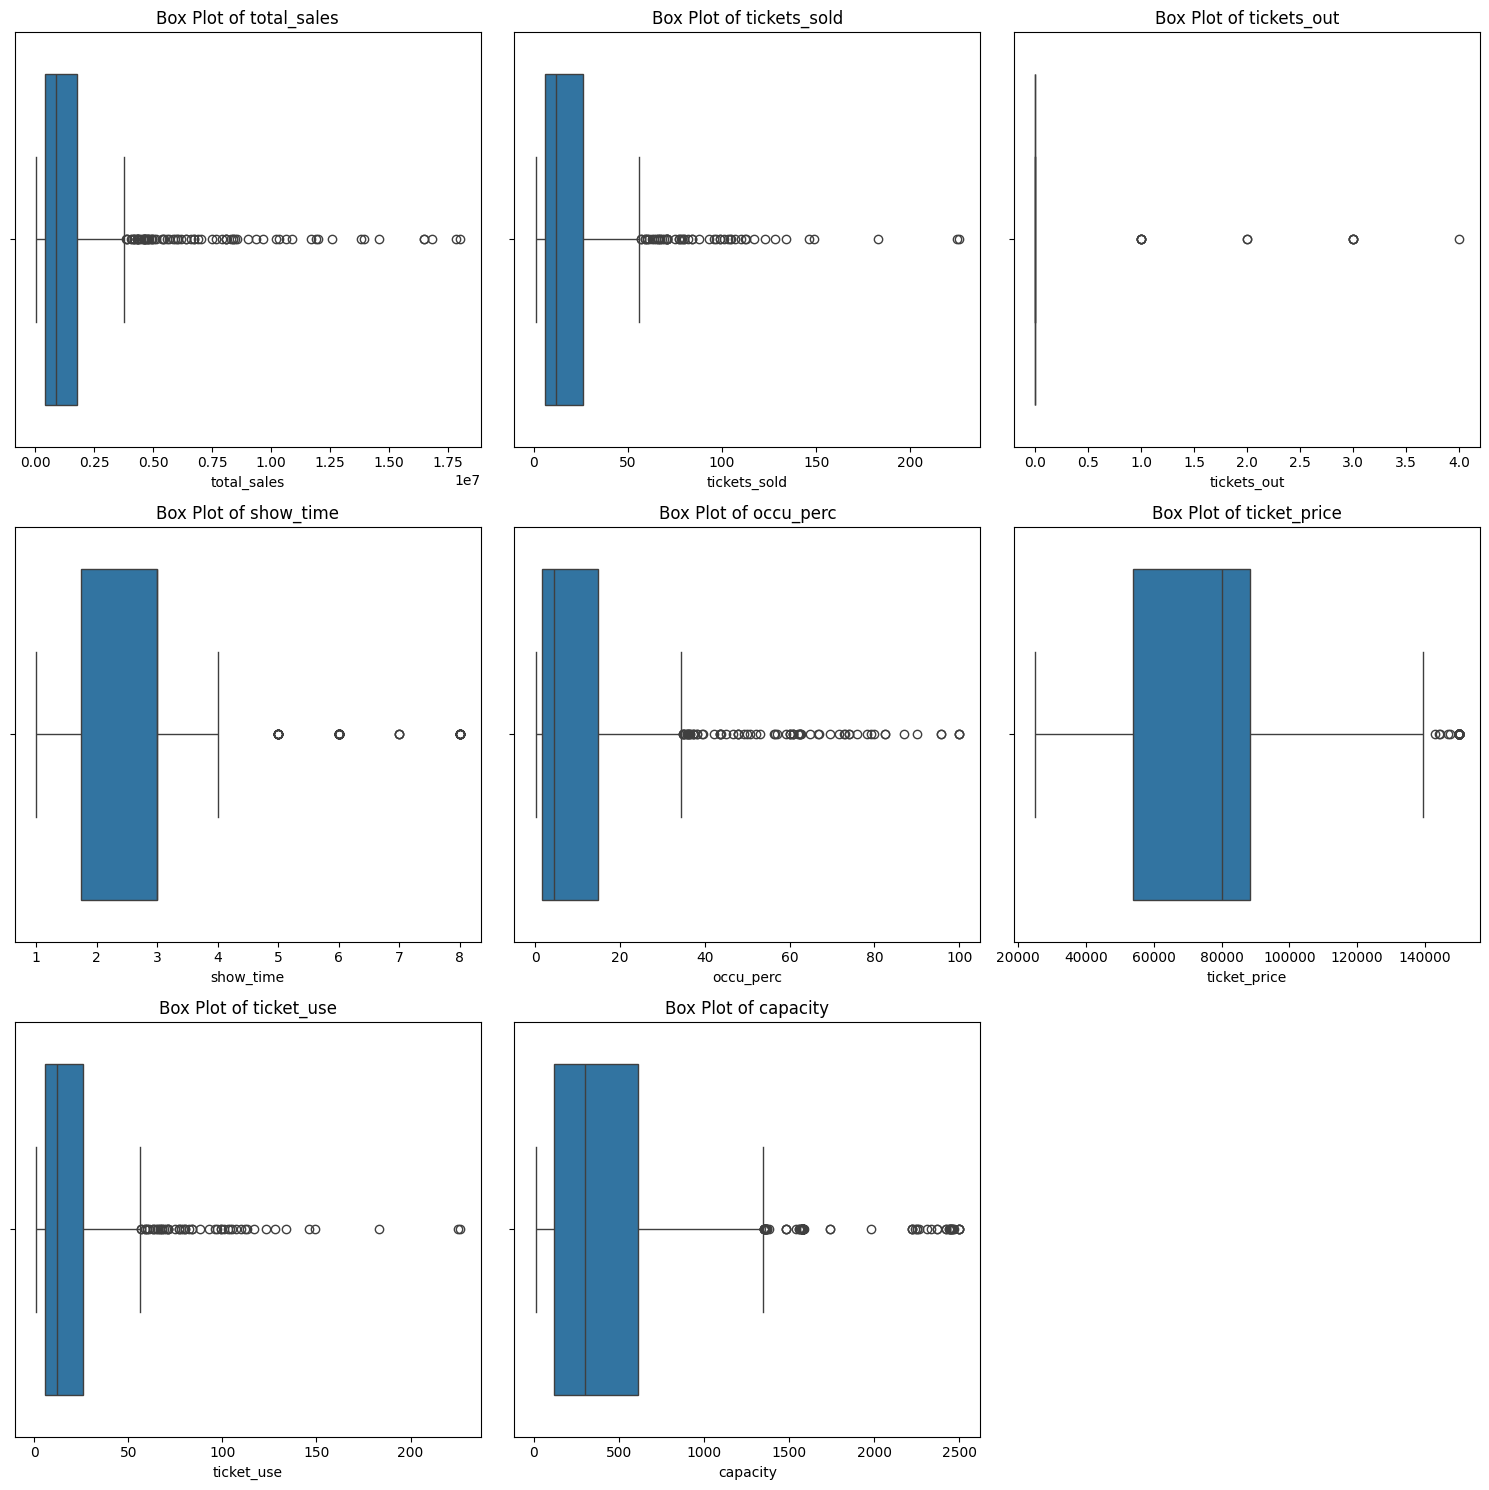

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()

plt.savefig('numeric_columns_boxplots.png')

plt.show()

Analysis of Your Box Plots
Total Sales (total_sales):

Box Plot Analysis: The total_sales variable shows significant right skewness. Most of the data points are concentrated near the lower end, with several outliers stretching far to the right.
Insight: This confirms the earlier distribution analysis, where a few high-performing showings dominate total sales. Most cinemas generate relatively low revenue, with a small number of outliers representing blockbuster films or very successful showings.
Tickets Sold (tickets_sold):

Box Plot Analysis: This plot shows similar behavior, with the majority of ticket sales below 50. There are numerous outliers with ticket sales exceeding 100.
Insight: Most showings have low attendance, but a small percentage sell significantly more tickets, representing the most popular or well-attended shows.
Tickets Out (tickets_out):

Box Plot Analysis: The box plot for tickets_out is extremely right-skewed, with almost all values clustered around zero and a few outliers extending beyond 2.5.
Insight: Most showings have very few unsold reserved tickets, but there are a few instances where a larger number of tickets were reserved but not sold, which could indicate poor performance for certain screenings.
Show Time (show_time):

Box Plot Analysis: The majority of the data shows show times between 1 and 3 screenings per day, with a few outliers extending beyond 4 showings.
Insight: Most cinemas seem to limit the number of showings per day, with only a small percentage scheduling more than 4 showings. The presence of multiple outliers indicates that a few cinemas may run high-demand films more frequently in a single day.
Occupancy Percentage (occu_perc):

Box Plot Analysis: The box plot for occu_perc reveals that most values lie below 20%, indicating low occupancy rates for most cinemas. There are several outliers with higher occupancy rates, up to 100%.
Insight: Most cinemas are under-utilizing their seating capacity, with very few showings achieving high occupancy. This could be related to factors like the film's popularity, the timing of the show, or pricing strategies.
Ticket Price (ticket_price):

Box Plot Analysis: The box plot for ticket price shows a bimodal distribution with two distinct ranges of common values: around 70,000 to 80,000 and 100,000 to 110,000 units. There are some outliers extending beyond 140,000.
Insight: This highlights that cinemas often have two pricing tiers, likely based on standard vs. premium screenings. The outliers could represent special events, VIP showings, or other premium pricing strategies.
Ticket Use (ticket_use):

Box Plot Analysis: The box plot for ticket usage shows a similar distribution to tickets_sold, with the majority of the values below 50 and a few outliers.
Insight: Most of the showings have low ticket usage, which corresponds to the low sales and occupancy trends observed in previous plots. However, there are outliers that represent well-attended events.
Capacity (capacity):

Box Plot Analysis: The capacity box plot shows that most cinemas have a capacity below 500 seats, with a few outliers extending up to 2,500.
Insight: This suggests that most cinemas in this dataset are smaller in size, with only a few large venues that can accommodate more than 1,000 attendees. The outliers represent larger cinemas, which are rare but present.

What is a Correlation Matrix?
A correlation matrix is a table that shows the correlation coefficients between multiple variables. Each cell in the matrix shows the correlation between two variables, with values ranging from -1 to 1:

1: Perfect positive correlation (as one variable increases, the other increases proportionally).
0: No correlation (no discernible relationship between the variables).
-1: Perfect negative correlation (as one variable increases, the other decreases proportionally).
The matrix is often visualized using a heatmap, where darker colors (usually blue or red) highlight stronger negative or positive correlations, respectively.

In [ ]:
corr = df.corr()

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

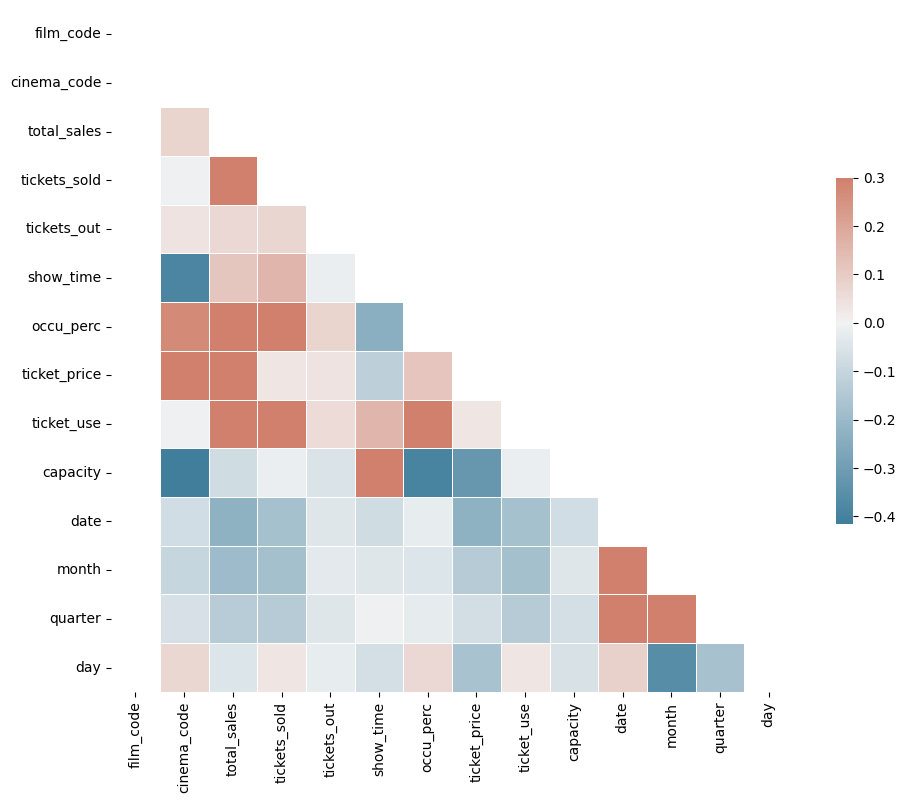

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('correlation_matrix.png')
plt.show()

Analysis of Your Correlation Matrix
From the matrix visualization, here are some key takeaways regarding the correlations between the variables in your cinema ticket dataset:

Total Sales (total_sales):

Strong positive correlation with tickets_sold and ticket_use: As expected, total sales increase as more tickets are sold or used. This suggests that these two variables are major contributors to total sales.
Positive correlation with occu_perc (occupancy percentage): Higher occupancy rates lead to increased total sales, although the correlation is moderate, implying that other factors, such as ticket price or capacity, also influence total sales.
Tickets Sold (tickets_sold):

Positive correlation with ticket_use and total_sales: This reflects the expected relationship where higher ticket sales correlate with higher total sales and ticket use.
Moderate correlation with capacity: This suggests that cinemas with larger capacities tend to sell more tickets, although the relationship is not perfect, meaning other factors (like cinema popularity or location) may play a role.
Tickets Out (tickets_out):

Weak to no correlation with most variables: The low correlation values for tickets_out indicate that the number of unsold tickets doesn't significantly relate to other variables. This could mean that reserved but unsold tickets are more sporadic or situation-dependent.
Show Time (show_time):

Low correlation with other variables: The number of showtimes doesn’t seem to correlate strongly with any other variables. This could suggest that factors like ticket sales or occupancy are more related to movie popularity rather than the number of screenings.
Occupancy Percentage (occu_perc):

Moderate positive correlation with tickets_sold, total_sales, and ticket_use: As the occupancy percentage increases, there is a corresponding increase in sales and ticket usage, which is logical as higher occupancy indicates more sold tickets.
Negative correlation with capacity: As cinema capacity increases, the occupancy percentage tends to decrease. This suggests that larger cinemas may struggle to fill seats, while smaller venues have higher occupancy percentages relative to their capacity.
Ticket Price (ticket_price):

Weak to no correlation with other variables: Interestingly, ticket price doesn’t show strong correlations with total sales or tickets sold. This suggests that higher prices do not necessarily lead to higher sales and that other factors (e.g., movie popularity or cinema size) might play a more important role in driving ticket sales.
Ticket Use (ticket_use):

Strong positive correlation with total_sales and tickets_sold: As more tickets are used, sales increase, and more tickets are sold, showing a logical and expected relationship.
Capacity (capacity):

Positive correlation with tickets_sold: As the capacity of the cinema increases, the number of tickets sold also tends to increase, albeit moderately. This indicates that larger cinemas sell more tickets, but the relationship isn't strong enough to suggest it's the only factor driving sales.
Negative correlation with occu_perc: As discussed earlier, larger capacities tend to result in lower occupancy percentages, meaning that these cinemas often don’t operate at full capacity.
Time Variables (month, quarter, day):

Low to no correlation with other variables: The time variables show weak correlations, suggesting that factors like the month, quarter, or specific day may not significantly influence the main features (like total sales or tickets sold) on their own.

# Data Preprocessing

Data Preprocessing and Feature Engineering for Clustering
This section details the steps taken to prepare the dataset for clustering by applying various transformations and techniques. These steps include handling skewed data, removing outliers, generating new features, encoding categorical variables, and standardizing the data. Finally, we perform dimensionality reduction using PCA to prepare the dataset for clustering.




In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# **Step 1 :**


Step 1: Log Transformation of Skewed Features To handle the skewness in some features (such as total_sales, tickets_sold, ticket_use, and occu_perc), we apply a log transformation using log1p(). This function computes the natural logarithm of one plus the input, which is useful for transforming data that contains zero values. Purpose: Log transformation reduces skewness and helps normalize the data, making it more suitable for clustering algorithms that assume normally distributed data.

In [ ]:
skewed_features = ['total_sales', 'tickets_sold', 'ticket_use', 'occu_perc']

for feature in skewed_features:
    df.loc[:, feature] = np.log1p(df[feature])

# **Step 2 :**

 Step 2: Handling Outliers To minimize the effect of extreme outliers in the data, we cap the values of numerical features at their 1st and 99th percentiles. This ensures that clustering results are not disproportionately affected by a few extreme values. Purpose: By capping outliers, we reduce their impact on distance-based algorithms such as K-Means, leading to more robust clustering.

In [ ]:
numeric_features = ['total_sales', 'tickets_sold', 'ticket_use', 'ticket_price', 'occu_perc', 'capacity']

for feature in numeric_features:
    upper_limit = df[feature].quantile(0.99)
    lower_limit = df[feature].quantile(0.01)
    df.loc[:, feature] = np.clip(df[feature], lower_limit, upper_limit)

# **Step 3 :**

 Step 3: Feature Engineering We create two new features to capture more meaningful insights:
revenue_per_seat: Measures how much revenue is generated per seat in each cinema. occupancy_efficiency: Measures how efficiently showtimes are being utilized based on the number of tickets sold. Purpose: These new features provide additional context for clustering cinemas based on their performance and efficiency metrics.

In [ ]:
df.loc[:, 'revenue_per_seat'] = df['total_sales'] / df['capacity']
df.loc[:, 'occupancy_efficiency'] = df['tickets_sold'] / df['show_time']

<ipython-input-15-608ea0b4c7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'revenue_per_seat'] = df['total_sales'] / df['capacity']
<ipython-input-15-608ea0b4c7f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'occupancy_efficiency'] = df['tickets_sold'] / df['show_time']


# **Step 4 :**

 Step 4: Handling Missing Data To deal with missing values in the numerical features, we use a mean imputation strategy, where any missing values are replaced by the mean of the respective column. Purpose: Imputing missing values ensures that the clustering process is not interrupted by missing data, providing a complete dataset for further analysis.

In [ ]:
imputer = SimpleImputer(strategy='mean')
df.loc[:, numeric_features] = imputer.fit_transform(df[numeric_features])

# **Step 5 :**

Step 5: One-Hot Encoding for Categorical Variables Since clustering algorithms require numerical data, we convert categorical variables (like cinema_code, film_code, and time-related features) into numerical format using one-hot encoding. Before doing this, we check which categorical columns are still present in the DataFrame. Purpose: One-hot encoding transforms categorical variables into binary format, allowing machine learning models to process them effectively.

In [ ]:
categorical_features = ['cinema_code', 'film_code', 'month', 'day', 'quarter']

existing_categorical_features = [col for col in categorical_features if col in df.columns]

if existing_categorical_features:
    df = pd.get_dummies(df, columns=existing_categorical_features, drop_first=True)
else:
    print("No categorical features available for one-hot encoding.")

# **Step 6 :**

 Step 6: Standardization of Numeric Features To ensure that all numerical features contribute equally to the clustering algorithm, we standardize them to have a mean of 0 and a standard deviation of 1. Purpose: Standardizing the data ensures that all features are on the same scale, preventing features with larger ranges from dominating the clustering process.

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_features + ['revenue_per_seat', 'occupancy_efficiency']])

# **Step 7 :**

Step 7: Principal Component Analysis (PCA) for Dimensionality Reduction To reduce the dimensionality of the dataset, we apply PCA. This helps simplify the clustering process by retaining only the most important components while discarding less informative ones. Purpose: Dimensionality reduction reduces computational complexity and improves clustering performance by removing redundant or irrelevant features.

In [ ]:
n_components = min(8, scaled_features.shape[1])
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(scaled_features)


# **Step 8 :**

 Step 8: Final Dataset Preparation for Clustering Finally, we combine the PCA-reduced features with the one-hot encoded categorical features to create the final dataset for clustering. The PCA components and categorical features are concatenated into one DataFrame. Purpose: This creates a fully preprocessed dataset with both PCA-reduced numerical features and one-hot encoded categorical features, ready for clustering.



In [ ]:
final_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

categorical_df = df.drop(columns=numeric_features + ['revenue_per_seat', 'occupancy_efficiency'])
final_df = pd.concat([final_df, categorical_df.reset_index(drop=True)], axis=1)

In [ ]:
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,tickets_out,show_time,...,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,quarter_3
0,1.263861,-0.996491,2.295839,0.223258,0.310172,-0.228700,-0.130160,-0.000958,0,4,...,False,False,False,False,False,False,False,False,False,False
1,1.443821,-1.643843,0.498830,-0.505161,-0.370809,-0.089400,0.082703,-0.001221,0,5,...,False,False,False,False,False,False,False,False,False,False
2,1.707267,-0.711365,0.307618,-0.848605,-0.618682,0.090631,0.030761,-0.001878,0,4,...,False,False,False,False,False,False,False,False,False,False
3,1.244572,1.208589,-0.264789,0.265859,1.127795,0.145351,0.014585,-0.001846,0,1,...,False,False,False,False,False,False,False,False,False,False
4,0.940553,0.289815,0.130005,-0.667767,-0.780098,0.169969,-0.009317,-0.001764,0,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.218333,0.299407,-1.055677,-0.761193,-0.044889,-0.067411,-0.195754,0.000398,0,2,...,False,False,False,False,False,False,False,False,False,False
796,-3.431532,-0.658516,-0.593486,0.323851,-0.163114,-0.042572,-0.107752,0.000902,0,3,...,False,False,False,False,False,False,False,False,False,False
797,-2.519539,1.318059,-1.033016,-0.365710,0.741421,0.006577,-0.005400,-0.000098,0,1,...,False,False,False,False,False,False,False,False,False,False
798,-4.103758,0.351515,0.364357,0.112401,-0.004837,0.011271,0.114692,0.000186,0,3,...,False,False,False,False,False,False,False,False,False,False


# **Step 9 :**

1. Remove or Convert Datetime Columns: If you have datetime columns, convert them to numerical values (e.g., by extracting year, month, day, or converting to a timestamp) or drop them if they aren’t relevant.

2. Convert Boolean Columns: Convert any boolean columns to integers (e.g., True -> 1, False -> 0).

3. Check for Other Object Types: Ensure there are no other non-numeric types (like strings) in your DataFrame.

In [ ]:
for col in final_df.select_dtypes(include=['datetime64']).columns:
    final_df[col] = final_df[col].astype('int64')

final_df = final_df.astype({col: 'int' for col in final_df.select_dtypes(include='bool').columns})

print(final_df.dtypes)


PC1          float64
PC2          float64
PC3          float64
PC4          float64
PC5          float64
              ...   
day_28         int64
day_29         int64
day_30         int64
day_31         int64
quarter_3      int64
Length: 107, dtype: object


# Kmeans

K-Means is a popular unsupervised learning algorithm used for clustering, which involves partitioning a dataset into k clusters based on similarities. The algorithm iteratively adjusts cluster centroids (the "center" of each cluster) and assigns data points to the nearest centroid until the centroids stop changing significantly. It is widely used in data mining, computer vision, and pattern recognition.


This function randomly selects k points from the dataset X to serve as initial cluster centroids.

X.shape[0]: Represents the number of samples in the dataset X.

replace=False: Ensures that the same point isn't selected more than once.

In [ ]:
def initialize_centroids(X, k):

    random_indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[random_indices, :]
    return centroids


This function assigns each point in X to the nearest centroid based on Euclidean distance.

cdist(X, centroids, 'euclidean'): Calculates the distances between each point in X and each centroid.

np.argmin(distances, axis=1): Returns the index of the closest centroid for each data point (i.e., assigns each point to a cluster).

In [ ]:
from scipy.spatial.distance import cdist

def assign_clusters(X, centroids):

    distances = cdist(X, centroids, 'euclidean')
    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels


This function recalculates the centroids by computing the mean of all points assigned to each cluster.

np.zeros((k, X.shape[1])): Initializes an empty array to store the updated centroids.

For each cluster, it calculates the mean of the points in that cluster and sets it as the new centroid.

In [ ]:
def update_centroids(X, cluster_labels, k):

    new_centroids = np.zeros((k, X.shape[1]))
    for cluster in range(k):
        cluster_points = X[cluster_labels == cluster]
        if len(cluster_points) > 0:
            new_centroids[cluster] = np.mean(cluster_points, axis=0)
    return new_centroids


The main K-Means algorithm:

**Step 1**: (Initialization): Randomly initialize centroids.

**Step 2**: (Assign Clusters): Assign each point to the nearest centroid.

**Step 3** : (Update Centroids): Recompute centroids based on the current cluster assignments.

**Step 4** : (Check Convergence): Check if the centroids have stopped moving significantly (below the tolerance tol).

**Step 5** : (Update): If centroids have not converged, repeat the process.

Convergence: The algorithm stops if the centroids' shift (movement) is less than the specified tolerance tol or if the maximum number of iterations (max_iters) is reached.

In [ ]:
def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, n_clusters)

    for i in range(max_iters):
        cluster_labels = assign_clusters(X, centroids)

        new_centroids = update_centroids(X, cluster_labels, n_clusters)

        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift < tol:
            print(f"Converged after {i+1} iterations.")
            break

        centroids = new_centroids


    return centroids, cluster_labels




KMeans: The K-Means clustering algorithm from sklearn.cluster.

silhouette_score: A metric from sklearn.metrics that calculates how well-separated the clusters are, with higher scores indicating better-defined clusters.

numpy: Provides support for numerical operations.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

Purpose: Defines the parameter grid for the grid search, listing all possible values for each K-Means parameter.

1. n_clusters: Specifies the number of clusters to evaluate, ranging from 2 to 10.

2. init: The initialization method for centroids, with options for 'k-means++' (optimized initialization) and 'random'.

3. max_iter: The maximum number of iterations for each run, set to test values of 100 and 300.

4. tol: The tolerance level for convergence; smaller values mean tighter convergence criteria.

In [ ]:
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}


best_score: Initializes with -1 to store the highest silhouette score found.

best_params: An empty dictionary to store the best combination of parameters when a new best score is found.

In [ ]:
best_score = -1
best_params = {}

Purpose: These nested loops iterate over every combination of parameters specified in param_grid.

1. For each combination, a KMeans instance is created with the current values of n_clusters, init, max_iter, and tol.

2. fit_predict(final_df): Fits K-Means on final_df and returns the cluster labels for each data point in the dataset.

Purpose: Calculates the silhouette score for the current clustering solution to evaluate how well-separated the clusters are.

1. silhouette_score(final_df, labels): Uses final_df and the cluster labels (labels) to compute the score.

2. Higher scores indicate better-defined clusters.

Purpose: Compares the current silhouette score with the best score found so far.

1. if score > best_score: If the current score is higher, update best_score and best_params.

2. best_score: Stores the highest silhouette score.

3. best_params: Updates with the best-performing parameters based on the current best score.

In [ ]:
for n_clusters in param_grid_kmeans['n_clusters']:
    for init in param_grid_kmeans['init']:
        for max_iter in param_grid_kmeans['max_iter']:
            for tol in param_grid_kmeans['tol']:

                     kmeans_grid = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=42)
                     labels = kmeans_grid.fit_predict(final_df)


                     score = silhouette_score(final_df, labels)


                     if score > best_score:
                        best_score = score
                        best_params = {
                           'n_clusters': n_clusters,
                           'init': init,
                           'max_iter': max_iter,
                           'tol': tol
                        }


Purpose: Outputs the best parameters and corresponding silhouette score.

best_params: Contains the optimal parameters for n_clusters, init, max_iter, and tol.

best_score: Displays the highest silhouette score achieved.

In [ ]:
print("Best parameters found for k_means:", best_params)
print("Best silhouette score for k_means:", best_score)

Best parameters found for k_means: {'n_clusters': 4, 'init': 'k-means++', 'max_iter': 100, 'tol': 0.0001}
Best silhouette score for k_means: 0.6578541152484274


In [ ]:
def compute_inertia(y, centroids, cluster_labels):

    inertia = 0
    for i in range(X.shape[0]):
        inertia += np.linalg.norm(X[i] - centroids[cluster_labels[i]])**2
    return inertia

def kmeans_inertia(X, k, max_iters=100, tol=1e-4):

    centroids = initialize_centroids(X, k)

    for i in range(max_iters):
        cluster_labels = assign_clusters(X, centroids)

        inertia = compute_inertia(X, centroids, cluster_labels)
        print(f"Iteration {i+1}, Inertia: {inertia}")

        new_centroids = update_centroids(X, cluster_labels, k)

        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift < tol:
            print(f"Converged after {i+1} iterations.")
            break

        centroids = new_centroids

    return centroids, cluster_labels, inertia

X = final_df.to_numpy()

centroids, labels, inertia = kmeans_inertia(X, k=4)

print("Final Inertia:", inertia)


Iteration 1, Inertia: 6.503547801600006e+32
Iteration 2, Inertia: 4.7592324566070886e+32
Iteration 3, Inertia: 3.812300982796047e+32
Iteration 4, Inertia: 3.4040625385440906e+32
Iteration 5, Inertia: 3.2273103093984866e+32
Iteration 6, Inertia: 3.177982144848788e+32
Iteration 7, Inertia: 3.1548857551303812e+32
Iteration 8, Inertia: 3.1266283962856467e+32
Iteration 9, Inertia: 3.1098833620373083e+32
Iteration 10, Inertia: 3.086256677223215e+32
Converged after 10 iterations.
Final Inertia: 3.086256677223215e+32



This function visualizes the data points and their assigned clusters using different colors, and marks the centroids with black 'x's.

It uses matplotlib to plot the clusters and the final centroids.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters(X, cluster_labels, centroids):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(cluster_labels)


    colormap = plt.cm.get_cmap("tab10", len(unique_labels))

    for label in unique_labels:
        cluster_points = X[cluster_labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colormap(label), label=f'Cluster {label}')

    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.title(f"KMeans Clustering (k = {len(centroids)})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

Checking for numeric columns: Ensures that all data is numeric by using .select_dtypes(include=[np.number]).

Converts the DataFrame final_df_numeric to a NumPy array (X) for use in the K-Means algorithm

In [ ]:
print(final_df.dtypes)


final_df_numeric = final_df.select_dtypes(include=[np.number])

X = final_df_numeric.to_numpy()

PC1          float64
PC2          float64
PC3          float64
PC4          float64
PC5          float64
              ...   
day_28         int64
day_29         int64
day_30         int64
day_31         int64
quarter_3      int64
Length: 107, dtype: object



k = 4: Defines the number of clusters.

The kmeans function is executed, returning the final centroids and cluster labels.

plot_clusters: Visualizes the clusters and centroids.

Converged after 15 iterations.


<ipython-input-63-be71af7e5791>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("tab10", len(unique_labels))


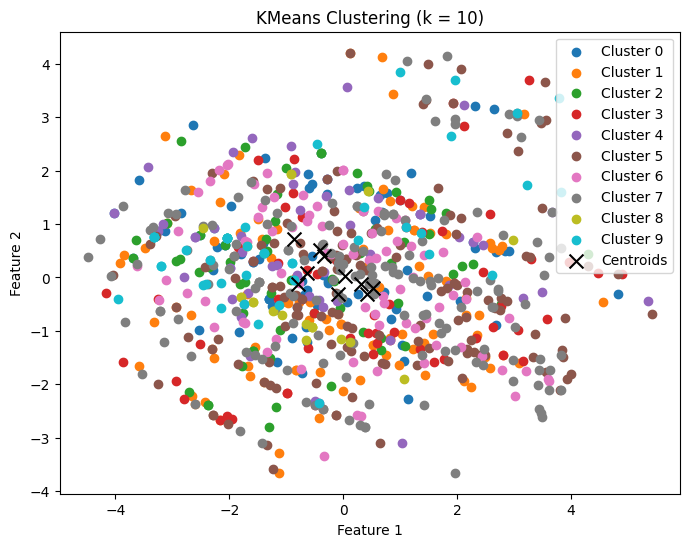

In [ ]:
k = 4
centroids, cluster_labels = kmeans(X, k)

plot_clusters(X, cluster_labels, centroids)

# KMediod

K-Medoids is a clustering algorithm similar to K-Means, but instead of using the mean of the data points in each cluster to determine the cluster center, it uses an actual data point called the "medoid" as the representative. The goal is to minimize the total distance between the points and the medoid of the cluster they are assigned to. K-Medoids is generally more robust to noise and outliers compared to K-Means because medoids are actual data points, whereas K-Means is influenced by extreme values when computing the mean.


This function calculates the distance between two points (point1 and point2).

It supports two types of distance metrics:

Euclidean distance: The square root of the sum of squared differences between corresponding coordinates.

Manhattan distance: The sum of absolute differences between corresponding coordinates.

In [ ]:
import random
import math

def calculate_distance(point1, point2, metric='euclidean'):
    if metric == 'euclidean':

        return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

    elif metric == 'manhattan':

        return sum(abs(p1 - p2) for p1, p2 in zip(point1, point2))

    else:
        raise ValueError("Unsupported metric. Choose 'euclidean' or 'manhattan'.")



This function assigns each data point to the cluster of the nearest medoid.

clusters is a dictionary where the key is the index of the medoid and the value is the list of points in that cluster.

For each point in the dataset, the distances to all medoids are calculated, and the point is assigned to the medoid with the minimum distance.

In [ ]:
def assign_clusters(data, medoids, metric):
    clusters = {}
    for i in range(len(medoids)):
        clusters[i] = []

    for point in data:
        distances = [calculate_distance(point, medoid, metric) for medoid in medoids]
        min_distance_index = distances.index(min(distances))
        clusters[min_distance_index].append(point)

    return clusters



This function calculates the total cost (or objective function value) of the current clustering.

For each point in a cluster, the distance to its medoid is calculated and added to the total cost.

The lower the cost, the better the clustering.

In [ ]:
def total_cost(clusters, medoids, metric):
    cost = 0
    for idx, points in clusters.items():
        medoid = medoids[idx]
        for point in points:
            cost += calculate_distance(point, medoid, metric)
    return cost

In [ ]:

def inertia(clusters, medoids, metric):
    inertia_value = 0
    for idx, points in clusters.items():
        medoid = medoids[idx]
        for point in points:
            if metric == 'euclidean':
                inertia_value += calculate_distance(point, medoid, metric) ** 2
            elif metric == 'manhattan':
                inertia_value += calculate_distance(point, medoid, metric)
    return inertia_value


This is the core function that implements the K-Medoids algorithm.

Initial Medoids: It starts by randomly selecting k medoids from the data.

Iterative Refinement:

For each iteration, it calculates clusters by assigning each point to the nearest medoid using the assign_clusters function.

It calculates the total cost for the current clustering using the total_cost function.

Then, it tries swapping each point in a cluster with the current medoid to see if the total cost can be reduced.

If swapping leads to a lower cost, it updates the medoid.

If no change happens (i.e., the medoids remain the same), the algorithm terminates early.

Output: The function returns the final set of medoids and clusters.

In [ ]:
def k_medoids(data, k, metric='euclidean', max_iter=100):

    medoids = random.sample(data, k)

    for iteration in range(max_iter):
        clusters = assign_clusters(data, medoids, metric)
        current_cost = total_cost(clusters, medoids, metric)

        new_medoids = medoids[:]

        for cluster_idx, points in clusters.items():
            for point in points:
                temp_medoids = medoids[:]
                temp_medoids[cluster_idx] = point
                new_clusters = assign_clusters(data, temp_medoids, metric)
                new_cost = total_cost(new_clusters, temp_medoids, metric)

                if new_cost < current_cost:
                    current_cost = new_cost
                    new_medoids = temp_medoids[:]

        if new_medoids == medoids:
            break

        medoids = new_medoids

    final_clusters = assign_clusters(data, medoids, metric)

    return medoids, final_clusters


This is an example to demonstrate the use of the k_medoids function.

The dataset consists of six 2D points.

We want to group the points into 3 clusters (k = 3) using Euclidean distance as the metric.

After running the algorithm, it prints the final medoids and the points assigned to each cluster.

In [ ]:
import numpy as np
import random

def k_medoids_inertia(data, k, metric='euclidean', max_iter=100):
    data = np.array(data)
    medoids = random.sample(list(data), k)

    for iteration in range(max_iter):
        clusters = assign_clusters(data, medoids, metric)


        for cluster_idx, points in clusters.items():
            if len(points) == 0:
                medoids[cluster_idx] = random.choice(data)
        current_cost = total_cost(clusters, medoids, metric)
        new_medoids = medoids[:]


        for cluster_idx, points in clusters.items():
            for point in points:
                temp_medoids = medoids[:]
                temp_medoids[cluster_idx] = point
                new_clusters = assign_clusters(data, temp_medoids, metric)
                new_cost = total_cost(new_clusters, temp_medoids, metric)

                if new_cost < current_cost:
                    current_cost = new_cost
                    new_medoids = temp_medoids[:]


        if np.array_equal(new_medoids, medoids):
            break

        medoids = new_medoids

    final_clusters = assign_clusters(data, medoids, metric)
    inertia_value = total_cost(final_clusters, medoids, metric)
    return medoids, final_clusters, inertia_value


In [ ]:
example_data = [
    [1, 2], [2, 3], [3, 4], [8, 8], [9, 8], [8, 9]
]
k = 3
medoids, clusters, inertia_value = k_medoids_inertia(example_data, k, metric='euclidean')

print("Medoids:", medoids)
print("Clusters:", clusters)

Medoids: [array([9, 8]), array([2, 3]), array([8, 9])]
Clusters: {0: [array([8, 8]), array([9, 8])], 1: [array([1, 2]), array([2, 3]), array([3, 4])], 2: [array([8, 9])]}


In [ ]:
data = final_df.to_numpy()

medoids, clusters, inertia_value = k_medoids_inertia(data, k=4, metric='euclidean')

print("Final Inertia:", inertia_value)

Final Inertia: 3.1622400000000006e+17


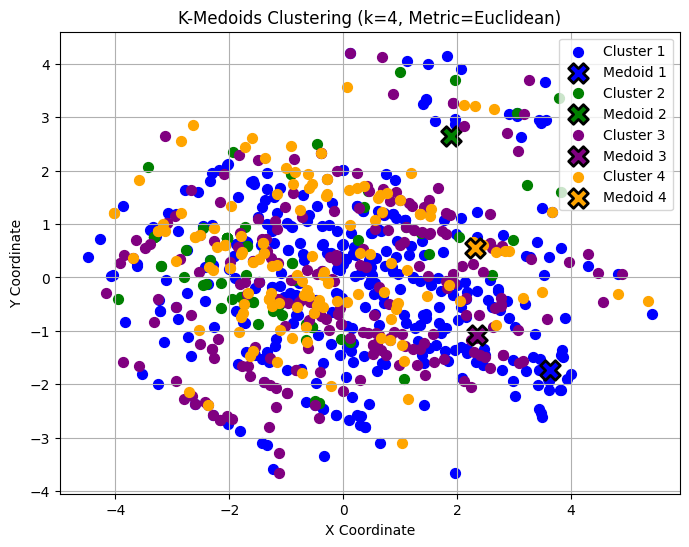

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plot_df = final_df.values.tolist()

k = 4
metric = 'euclidean'
medoids, clusters = k_medoids(plot_df, k, metric)



plot_df = np.array(plot_df)
medoids = np.array(medoids)

plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'purple', 'orange', 'cyan']
for cluster_idx, points in clusters.items():
    cluster_points = np.array(points)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')
    plt.scatter(medoids[cluster_idx, 0], medoids[cluster_idx, 1], s=200, color=colors[cluster_idx], marker='X', edgecolor='black', linewidth=2, label=f'Medoid {cluster_idx + 1}')

plt.title(f'K-Medoids Clustering (k={k}, Metric={metric.capitalize()})')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
! pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.7 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import numpy as np

**Explanation of param_grid_kmedoids :**

The param_grid_kmedoids is a dictionary that defines a set of hyperparameters for tuning the K-Medoids clustering algorithm. It allows you to explore different configurations of the algorithm to find the optimal clustering performance for your dataset. Each key in the dictionary corresponds to a specific parameter of the KMedoids implementation, and its values are the potential options for that parameter.

Here’s a detailed breakdown of the parameters:

1. **n_clusters**

  Definition: Specifies the number of clusters to form.

  Values: [2, 3, 4, 5 , 6]

  Testing 2,3, 4,5 , and 6 clusters to find the most suitable grouping for your data.
  
  Why Important: The correct number of clusters depends on the dataset structure. Testing different values allows you to identify the configuration that maximizes cluster separation (e.g., using silhouette score).

2. **metric**

  Definition: Determines the distance metric used to compute dissimilarity between points.
  
  Values: ['euclidean', 'manhattan']
  
  Euclidean: Standard straight-line distance (default for many clustering algorithms).

  Manhattan: Sum of absolute differences, better for high-dimensional or grid-like data.

  Why Important: Different datasets might have features better suited to
  specific distance metrics. Testing both ensures the best fit for your data.

3. **init**
  
  Definition: Initialization strategy for selecting the initial medoids.
  
  Values: ['k-medoids++', 'random']
  
  k-medoids++: Chooses initial medoids to speed up convergence and improve clustering quality.
  
  random: Randomly selects initial medoids.
  
  Why Important: Initialization can significantly affect clustering outcomes. Using k-medoids++ often results in better clusters, but testing random ensures robustness.

4. **max_iter**
  
  Definition: Maximum number of iterations allowed for the algorithm to converge.
  
  Values: [100, 200 , 300]
  
  Testing 100 and 200 iterations to balance computational cost and convergence accuracy.
  
  Why Important: Ensures that the algorithm has sufficient iterations to refine clusters without excessive computation.

5. **method**
  
  Definition: Specifies the algorithm used to update medoids during clustering.
  
  Values: ['pam', 'alternate']
  
  pam (Partitioning Around Medoids): Traditional and robust medoid selection algorithm.
  
  alternate: Faster alternative for large datasets.
  
  Why Important: The choice between pam and alternate affects both computational efficiency and clustering quality, depending on the dataset size and complexity.


In [ ]:
param_grid_kmedoids = {
    'n_clusters': [2, 3, 4, 5, 6],
    'metric': ['euclidean', 'manhattan', 'cosine'],
    'init': ['k-medoids++', 'random'],
    'max_iter': [100, 200, 300],
    'method': ['pam', 'alternate']
}



The variables best_score and best_params_ are used to track the best-performing configuration of a clustering algorithm during hyperparameter tuning. They serve as placeholders to store the highest score achieved and the corresponding hyperparameters.




In [ ]:
best_score = -1
best_params_ = {}

**Explanation of K-Medoids Hyperparameter Tuning Code**

This code implements a grid search approach to tune the hyperparameters of the K-Medoids clustering algorithm. It iterates through all possible combinations of parameters defined in the param_grid_kmedoids dictionary and evaluates their performance based on the silhouette score. The goal is to identify the combination of hyperparameters that yields the best clustering results.

1. **Nested Loops for Grid Search**

  Purpose:

  Iterates over all possible combinations of hyperparameters defined in param_grid_kmedoids.

2. **Model Creation**
  
  Purpose:
  
  Creates a new KMedoids model for each combination of hyperparameters.

  The random_state ensures reproducibility of results.
  
  This model will be fit to the data in the next steps.

3. **Fitting and Predicting**

  Purpose:
  
  Fits the KMedoids model on the dataset (final_df) and predicts the cluster labels for each data point.

  labels: The cluster assignments for each data point.

4. **Handling Empty Clusters**

  Purpose:

  Ensures that all clusters contain at least one data point. If any cluster is empty, the current configuration is skipped.

  unique_labels: Set of unique cluster labels.
  
  cluster_sizes: List of data points in each cluster.

5. **Evaluating the Clustering Performance**

  Purpose:

  Computes the silhouette score for the current clustering configuration. This score measures how well-separated the clusters are (higher is better).

  Condition: Silhouette score is only meaningful if there are at least two clusters.

6. **Updating the Best Configuration**

  Purpose:

  Tracks the best hyperparameter combination based on the highest silhouette score.

In [ ]:

for n_clusters in param_grid_kmedoids['n_clusters']:
   for metric in param_grid_kmedoids['metric']:
     for init in param_grid_kmedoids['init']:
        for max_iter in param_grid_kmedoids['max_iter']:
           for method in param_grid_kmedoids['method']:

                kmedoid_grid = KMedoids(n_clusters=n_clusters, metric=metric,  init=init, max_iter=max_iter,  method=method, random_state=42)
                labels = kmedoid_grid.fit_predict(final_df)

                unique_labels = set(labels)
                cluster_sizes = [list(labels).count(label) for label in unique_labels]

                if any(size == 0 for size in cluster_sizes):
                    continue

                if len(unique_labels) > 1:
                    score = silhouette_score(final_df, labels)


                if score > best_score:
                    best_score = score
                    best_params = {
                        'n_clusters': n_clusters,
                        'metric' : metric,
                        'init': init,
                        'max_iter': max_iter,
                        'method' : method
                    }


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 

After completing the grid search, the code prints the best silhouette score and the corresponding hyperparameters:

best_score: Highest silhouette score achieved.

best_params: Dictionary containing the optimal hyperparameter configuration.

In [ ]:
print("Best parameters found for k_medoid:", best_params)
print("Best silhouette score for k_medoid:", best_score)

Best parameters found for k_medoid: {'n_clusters': 4, 'metric': 'euclidean', 'init': 'k-medoids++', 'max_iter': 100, 'method': 'pam'}
Best silhouette score for k_medoid: 0.6566897911456713


# DBscan

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm used in machine learning. It groups points that are closely packed together (points with many nearby neighbors) and marks points that are in low-density regions (that is, points that don't belong to any cluster) as outliers (or noise). Unlike other clustering algorithms like k-means, DBSCAN doesn't require you to specify the number of clusters beforehand. It works with two main parameters:

eps (ε): The maximum distance between two points for them to be considered neighbors.

min_samples: The minimum number of points in a neighborhood to form a dense region (i.e., to consider a point a core point).

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
import numpy as np

Class DBSCAN ,This class will implement the DBSCAN algorithm.


init function: This is the constructor for the class. It initializes the DBSCAN object with two parameters:

eps: The maximum distance between two points to be considered as part of the same neighborhood.

min_samples: The minimum number of points required to form a cluster.

self.labels_: An empty list that will store the final cluster labels for each point.

In [ ]:
class DBSCAN:
    def init(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = []


The fit function is where the algorithm starts clustering the data points in X.

self.labels_: Initially, all points are assigned the label -1, indicating that they are noise or unvisited.

cluster_id: This is the unique identifier for each cluster, initialized to 0. It increments as new clusters are formed.


This loop goes through every point in the dataset X. If the point has already been assigned a label (i.e., it's already part of a cluster or has been marked as noise), it skips to the next point.

neighbors = self.region_query(X, i)
This calls the region_query function, which returns a list of points in the neighborhood of point i that are within the distance eps.


If the number of neighbors is less than min_samples, the point is marked as noise (self.labels_[i] = -1).

Otherwise, the point is considered a core point, and the algorithm tries to expand the cluster using the expand_cluster function. After successfully expanding, it increments the cluster_id to start a new cluster when it finds another core point.

In [ ]:
def fit(self, X):

        self.labels_ = [-1] * len(X)
        cluster_id = 0

        for i in range(len(X)):
            if self.labels_[i] != -1:

                continue


            neighbors = self.region_query(X, i)

            if len(neighbors) < self.min_samples:

                self.labels_[i] = -1
            else:

                self.expand_cluster(X, i, neighbors, cluster_id)
                cluster_id += 1


expand_cluster function: This function takes the core point (index i), its neighbors, and the current cluster ID and assigns all relevant points to that cluster.

The point i is assigned to the current cluster_id.

The algorithm processes each neighbor of the core point. j keeps track of the current neighbor being checked.

If a neighbor has been previously marked as noise (labels_ == -1), it is now considered part of the current cluster.

This checks if a point is unvisited. If so, it assigns that point to the current cluster.

The algorithm checks whether the newly added point is itself a core point by calling region_query again for that point. If the new point has enough neighbors (>= min_samples), those neighbors are also added to the list for further checking, which helps in expanding the cluster.

In [ ]:
def expand_cluster(self, X, i, neighbors, cluster_id):
        self.labels_[i] = cluster_id


        j = 0
        while j < len(neighbors):
            point = neighbors[j]

            if self.labels_[point] == -1:

                self.labels_[point] = cluster_id

            elif self.labels_[point] == -1:

                self.labels_[point] = cluster_id


                point_neighbors = self.region_query(X, point)

                if len(point_neighbors) >= self.min_samples:

                    neighbors += point_neighbors

            j += 1


The region_query function is responsible for finding all points in the dataset X that are within eps distance from point i.

It calculates the distance between point i and all other points (np.linalg.norm(X[i] - X[j])) and adds those points to the list of neighbors if they are within eps.

In [ ]:
def region_query(self, X, i):
        neighbors = []

        for j in range(len(X)):
            if np.linalg.norm(X[i] - X[j]) < self.eps:
                neighbors.append(j)

        return neighbors


Example dataset X containing six 2D points. These are the points that the DBSCAN algorithm will attempt to cluster.

In [ ]:
X = np.array([
    [1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]
])


This code visualizes the impact of different combinations of eps (epsilon) and min_samples parameters on the DBSCAN clustering results.

1. Define Parameter Ranges:

   eps_values is a range of values for eps, which controls the maximum distance between points in a neighborhood.

  min_samples_values is a range for min_samples, determining the minimum number of points required in a neighborhood for a point to be considered a core point.

2. Initialize Plot Grid:

   A grid of subplots is created using plt.subplots(), with rows and columns matching the length of eps_values and min_samples_values, respectively. Each subplot will show clustering results for one combination of these parameters.

3. Iterate Over Parameters:

   The code iterates through each combination of eps and min_samples using nested for loops.

   Inside these loops, it instantiates a DBSCAN object with the current eps and min_samples values and applies it to df (assumed to be the dataset). The dbscan.fit(df) command computes the clustering based on the parameters.

4. Visualize Clusters:

   labels = dbscan.labels_ retrieves the cluster labels assigned to each point by DBSCAN. Points labeled -1 are considered outliers.

   A scatter plot is created for each subplot using axs[i, j].scatter(), coloring points by their assigned cluster.

   Titles are added to each subplot to indicate the parameter values for that specific clustering result.

5. Finalize Plot Layout:

   Finally, plt.tight_layout() ensures the plots are well-spaced, and plt.show() displays the grid.

This grid of scatter plots enables a visual comparison of how changing eps and min_samples affects clustering. For example, smaller eps values might result in more clusters or outliers, while larger min_samples values may increase the number of outliers by making the criteria for core points stricter.

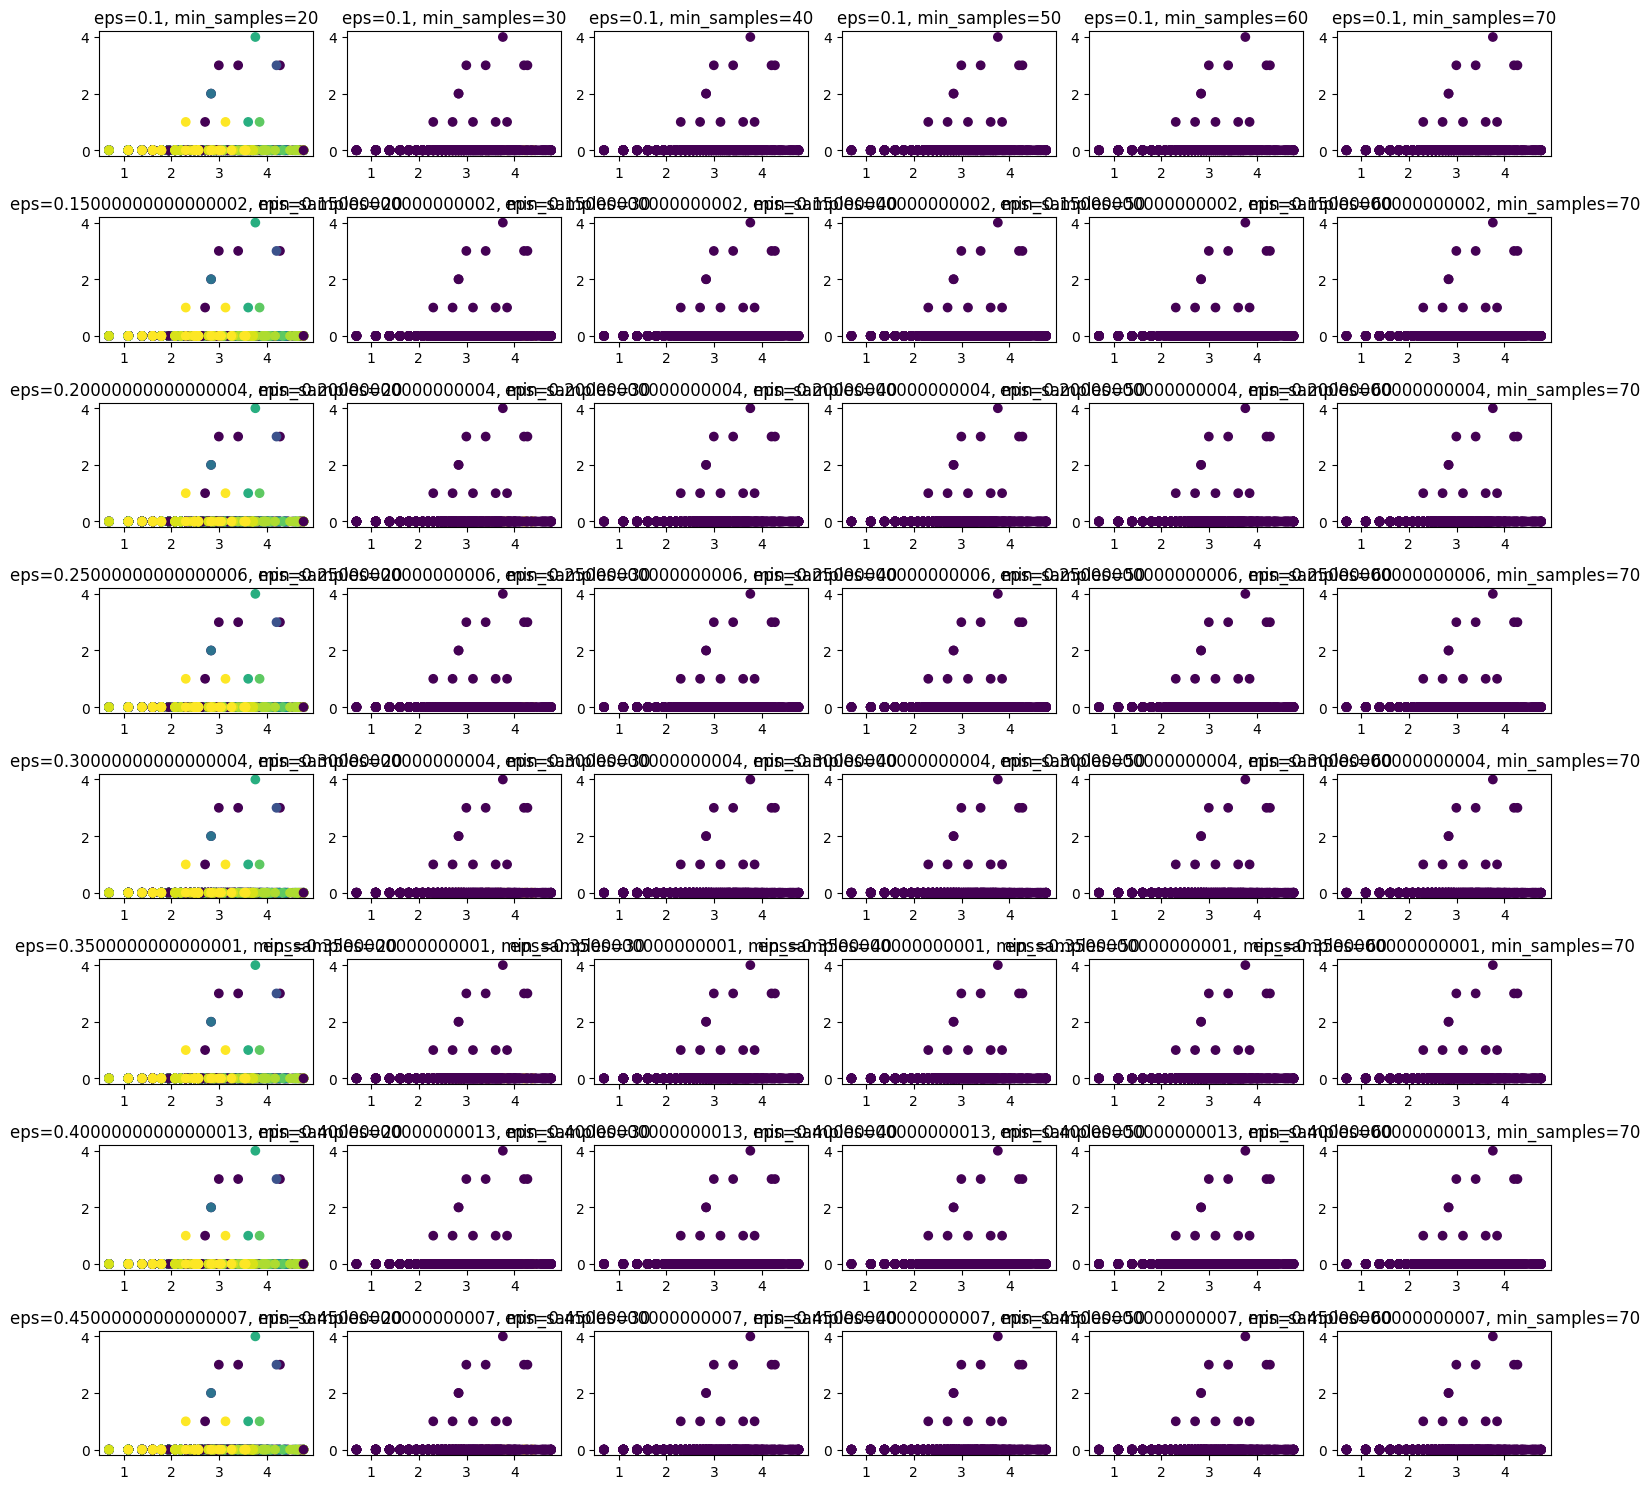

In [ ]:
from sklearn.cluster import DBSCAN


eps_values = np.arange(0.1, 0.5, 0.05)
min_samples_values = range(20, 80, 10)

fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(final_df)
        labels = dbscan.labels_

        axs[i, j].scatter(df.iloc[:,1], df.iloc[:,2], c=labels)
        axs[i, j].set_title(f'eps={eps}, min_samples={min_samples}')

plt.tight_layout()
plt.show()

The code does not work well for the dataset because the plot shows that the DBSCAN clustering is not generating meaningful or distinguishable clusters across all combinations of eps and min_samples.

In [ ]:
silhouette_avg_dbscan = silhouette_score(final_df, labels)
print('silhouette dbscan', silhouette_avg_dbscan)

DBSCAN did not produce enough clusters to compute silhouette score


# MeanShift

In [ ]:
from sklearn.cluster import MeanShift

Mean Shift is a non-parametric clustering technique that works by iteratively shifting data points towards regions of higher density (called "modes"). Unlike k-means, it doesn’t require specifying the number of clusters beforehand. The algorithm works by treating the dataset as a probability density function (PDF) and iteratively moving points toward regions where the density is high. It relies on a kernel function (typically a Gaussian kernel) to estimate the density and guide the shift.

# Key Parameters:

1. **Bandwidth:**

   Controls the size of the neighborhood (radius) considered when calculating the shift. A larger bandwidth causes the points to be influenced by more distant neighbors, leading to smoother shifts. A smaller bandwidth makes the algorithm more sensitive to local clusters.

2. **Max Iterations (max_iters):**

   Limits the number of iterations the algorithm performs to prevent it from running indefinitely.

3. **Convergence Threshold (epsilon):**

   Determines the stopping condition. If the points move by less than epsilon during an iteration, the algorithm halts, assuming convergence.

# How Mean Shift Works:

1. **Neighborhood Search:** For each point, the algorithm identifies the points within its neighborhood (using the bandwidth).

2. **Shifting:** The point is shifted towards the average of its neighbors, weighted by their distance (using the Gaussian kernel).

3. **Convergence:** This process is repeated for all points until they all converge to the modes of the dataset, representing dense regions.

The result is that points that start close to each other and lie in high-density regions will converge to the same mode, forming a cluster.

In [ ]:
df_copy_ms = df.copy()


The Gaussian kernel is used to determine the "weight" of points in the neighborhood of the current point. Points that are closer to the current point will have a higher weight, while points farther away will contribute less. This weighting is based on the bandwidth parameter, which controls the radius of influence for each point. A larger bandwidth means a broader region is considered in the shifting process.

In [ ]:
import numpy as np

def gaussian_kernel(distance, bandwidth):

    return np.exp(-0.5 * (distance ** 2) / (bandwidth ** 2))




This function shifts a single data point towards the mean of the points in its neighborhood. The process is as follows:

For each point in the dataset (points), the Euclidean distance between the current point and the data point p is calculated.

The Gaussian kernel is applied to this distance to compute the weight, which determines how much influence p has on the shift.

The weighted sum of all nearby points is calculated (shift), and this sum is divided by the total weight to get the new position of the current point.

This step effectively moves the point towards a region of higher density by averaging nearby points, weighted by their distance.

In [ ]:
def shift_point(point, points, bandwidth):

    shift = np.zeros_like(point)
    total_weight = 0

    for p in points:
        distance = np.linalg.norm(point - p)
        weight = gaussian_kernel(distance, bandwidth)
        shift += p * weight
        total_weight += weight

    return shift / total_weight


The mean_shift function applies the Mean Shift algorithm to the dataset. The steps are:

1. **Initialization:**

   points is converted to a NumPy array for efficient computation.

   A copy of the points (shifted_points) is created to store the updated positions of the points after each iteration.

2. **Iteration:**

   The algorithm iterates up to max_iters times, shifting each point in the dataset towards higher density areas. For each point:

   It computes a new position by calling shift_point().

   The shift_distance is calculated as the Euclidean distance between the old position and the new position.

   The maximum shift for this iteration is tracked (max_shift), which is used to determine convergence.

3. **Convergence:**

   If the largest shift (max_shift) in an iteration is smaller than a small threshold (epsilon), the algorithm stops. This indicates that the points have converged to the modes (i.e., areas of highest density) and no further significant movement is happening.

4. **Return:**

   The algorithm returns the shifted points, which should be centered around the density modes.

In [ ]:
def mean_shift(points, bandwidth=1, max_iters=100, epsilon=1e-3):

    points = np.array(points)
    shifted_points = np.copy(points)

    for it in range(max_iters):
        max_shift = 0
        for i, point in enumerate(shifted_points):
            new_point = shift_point(point, points, bandwidth)
            shift_distance = np.linalg.norm(new_point - point)
            max_shift = max(max_shift, shift_distance)
            shifted_points[i] = new_point

        if max_shift < epsilon:
            break

    return shifted_points

1.**calculate_inertia Function:**

1. **Inputs:**
  
  X: Your dataset (e.g., a NumPy array or similar structure).
  
  centroids: The cluster centers output by the clustering algorithm.
  
  labels: The cluster assignments for each point.
  
2. **Logic:**
  
  For each cluster, it calculates the squared distance between all points in the cluster and the cluster's center.
  
  The distances are summed to compute the inertia.
  
2.**How It Works with MeanShift:**

  MeanShift provides cluster_centers_ and labels_ that directly match the inputs required for calculate_inertia.
  
3.**Why Use This?**

  If you need a manual implementation of inertia, especially for clustering methods like MeanShift, this approach is clear and reusable.

In [ ]:

import numpy as np
from sklearn.cluster import MeanShift

def calculate_inertia(X, centroids, labels):

    inertia = 0
    for i, centroid in enumerate(centroids):

        cluster_points = X[labels == i]

        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia


mean_shift = MeanShift()
mean_shift.fit(X)

centroids = mean_shift.cluster_centers_
labels = mean_shift.labels_


inertia = calculate_inertia(X, centroids, labels)
print(f"Inertia: {inertia}")



Inertia: 8.849400468757493e+32


In [ ]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

**Explanation of param_grid_meanshift**

The param_grid_meanshift is a dictionary that defines the range of hyperparameters for tuning the Mean Shift clustering algorithm. By specifying multiple values for each parameter, this grid enables a systematic search for the best configuration to maximize clustering performance.

**Key Components of param_grid_meanshift :**

1. bandwidth

  Definition:

  The radius of influence for the kernel used in Mean Shift clustering.
  
  Controls how far points can "pull" each other during the clustering process.
  
  Values: [0.5, 1.0, 2.0]
  
  Tests small (0.5), medium (1.0), and large (2.0) kernel sizes.
  
  Smaller values result in more clusters because points need to be closer to form a cluster.
  
  Larger values result in fewer clusters as points farther apart are grouped together.
  
  Why Important:

  The bandwidth parameter is crucial for the performance of Mean Shift. An appropriate value ensures meaningful clusters that reflect the underlying data structure.

2. max_iter

  Definition:

  The maximum number of iterations the algorithm is allowed to perform before convergence.
  
  Values: [100, 200, 300]

  Tests different iteration limits to balance computational cost and convergence accuracy.
  
  Lower values may result in early stopping before convergence.
  
  Higher values ensure that the algorithm fully refines clusters but may increase computation time.
  
  Why Important:

  Setting an appropriate max_iter ensures that Mean Shift has enough iterations to refine the cluster centers without wasting computational resources.

3. epsilon

  eps_values is a range of values for eps, which controls the maximum distance between points in a neighborhood.



In [ ]:
param_grid_meanshift = {
    'bandwidth': [0.5, 1, 2, 3, 4],
    'max_iter': [100, 200, 300],
    'epsilon': [1e-3, 1e-4],
}

eps_values is a range of values for eps, which controls the maximum distance between points in a neighborhood.

min_samples_values is a range for min_samples, determining the minimum number of points required in a neighborhood for a point to be considered a core point.

In [ ]:
meanshift_best_score = -1
meanshift_best_params = {}

**Explanation of K-Medoids Hyperparameter Tuning Code**

This code implements a grid search approach to tune the hyperparameters of the K-Medoids clustering algorithm. It iterates through all possible combinations of parameters defined in the param_grid_kmedoids dictionary and evaluates their performance based on the silhouette score. The goal is to identify the combination of hyperparameters that yields the best clustering results.

1. **Nested Loops for Grid Search**

  Purpose:

  Iterates over all possible combinations of hyperparameters defined in param_grid_kmedoids.

2. **Model Creation**
  
  Purpose:
  
  Creates a new KMedoids model for each combination of hyperparameters.

  The random_state ensures reproducibility of results.
  
  This model will be fit to the data in the next steps.

3. **Fitting and Predicting**

  Purpose:
  
  Fits the KMedoids model on the dataset (final_df) and predicts the cluster labels for each data point.

  labels: The cluster assignments for each data point.

4. **Handling Empty Clusters**

  Purpose:

  Ensures that all clusters contain at least one data point. If any cluster is empty, the current configuration is skipped.

  unique_labels: Set of unique cluster labels.
  
  cluster_sizes: List of data points in each cluster.

5. **Evaluating the Clustering Performance**

  Purpose:

  Computes the silhouette score for the current clustering configuration. This score measures how well-separated the clusters are (higher is better).

  Condition: Silhouette score is only meaningful if there are at least two clusters.

6. **Updating the Best Configuration**

  Purpose:

  Tracks the best hyperparameter combination based on the highest silhouette score.

In [ ]:
for bandwidth in param_grid_meanshift['bandwidth']:
    for max_iter in param_grid_meanshift['max_iter']:
        for epsilon in param_grid_meanshift['epsilon']:


            mean_shift_model = MeanShift(bandwidth=bandwidth, max_iter=max_iter, min_bin_freq=1)


            mean_shift_model.fit(final_df)


            labels = mean_shift_model.labels_


            if len(np.unique(labels)) > 1:
                score = silhouette_score(final_df, labels)

                print(f"Bandwidth: {bandwidth}, Max Iter: {max_iter}, Epsilon: {epsilon}, Silhouette Score: {score}")


                if score > meanshift_best_score:
                    meanshift_best_score = score
                    meanshift_best_params = {
                        'bandwidth': bandwidth,
                        'max_iter': max_iter,
                        'epsilon': epsilon
                    }


Bandwidth: 0.5, Max Iter: 100, Epsilon: 0.001, Silhouette Score: 0.98125
Bandwidth: 0.5, Max Iter: 100, Epsilon: 0.0001, Silhouette Score: 0.98125
Bandwidth: 0.5, Max Iter: 200, Epsilon: 0.001, Silhouette Score: 0.98125
Bandwidth: 0.5, Max Iter: 200, Epsilon: 0.0001, Silhouette Score: 0.98125
Bandwidth: 0.5, Max Iter: 300, Epsilon: 0.001, Silhouette Score: 0.98125
Bandwidth: 0.5, Max Iter: 300, Epsilon: 0.0001, Silhouette Score: 0.98125
Bandwidth: 1, Max Iter: 100, Epsilon: 0.001, Silhouette Score: 0.98125
Bandwidth: 1, Max Iter: 100, Epsilon: 0.0001, Silhouette Score: 0.98125
Bandwidth: 1, Max Iter: 200, Epsilon: 0.001, Silhouette Score: 0.98125
Bandwidth: 1, Max Iter: 200, Epsilon: 0.0001, Silhouette Score: 0.98125
Bandwidth: 1, Max Iter: 300, Epsilon: 0.001, Silhouette Score: 0.98125
Bandwidth: 1, Max Iter: 300, Epsilon: 0.0001, Silhouette Score: 0.98125
Bandwidth: 2, Max Iter: 100, Epsilon: 0.001, Silhouette Score: 0.98125
Bandwidth: 2, Max Iter: 100, Epsilon: 0.0001, Silhouette Sc

After completing the grid search, the code prints the best silhouette score and the corresponding hyperparameters:

best_score: Highest silhouette score achieved.

best_params: Dictionary containing the optimal hyperparameter configuration.

In [ ]:
print("\nBest Score for Meanshift:", meanshift_best_score)
print("Best Parameters Meanshift:", meanshift_best_params)


Best Score for Meanshift: 0.98125
Best Parameters Meanshift: {'bandwidth': 0.5, 'max_iter': 100, 'epsilon': 0.001}


Both metrics combined will give you an idea of how good the clusters generated by Mean Shift are in terms of compactness (inertia) and separation (silhouette score).

# hierarchical

1.In this section, we use the dendrogram and linkage functions from the scipy.cluster.hierarchy module to perform hierarchical clustering and visualize the results.

1. **linkage:**

  This function computes the hierarchical clustering of the dataset.
  
  It takes the dataset (X) as input and calculates the distances between points to iteratively merge clusters.
  
  The result is a linkage matrix, which encodes the clustering hierarchy.

2. **dendrogram:**

  The dendrogram function visualizes the hierarchical clustering results.

  It takes the linkage matrix as input and generates a tree-like diagram where:

  Each leaf represents a data point.

  Branches represent the merging of clusters at different levels of similarity.
  
  By interpreting the dendrogram, we can decide the optimal number of clusters (e.g., by cutting the tree at a certain height).

3. **Key Parameters:**

  In linkage, the method parameter specifies the clustering algorithm (e.g., 'ward' for Ward’s method, 'single' for single-linkage).
  
  In dendrogram, additional parameters (like truncate_mode) control the visualization (e.g., showing only the last few merges for clarity).



2.The code from sklearn.cluster import AgglomerativeClustering imports the Agglomerative Clustering algorithm from the sklearn.cluster module. This clustering method is part of the hierarchical clustering family and is widely used for grouping data points based on their similarity.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

A hierarchical structure in programming is a system where classes are organized in levels of inheritance. Each class in the hierarchy builds on the functionality of its parent (or base) class, and can also add or override functionality to fit its own role. This reflects real-world relationships such as those in an organization.

1.**Base Class: Employee**

The Employee class is the base class from which other classes (like Manager and DepartmentHead) inherit.
init(self, name, position): This is the constructor that initializes an employee with a name and position.

get_details(self): This method returns a string representation of the employee’s name and position.

In [ ]:
class Employee:
    def __init__(self, name, position):
        self.name = name
        self.position = position

    def get_details(self):
        return f"Name: {self.name}, Position: {self.position}"


2.**Intermediate Class: Manager**

The Manager class inherits from Employee. It represents a manager who can have multiple employees under their supervision.

1. **Inheritance:** The Manager class uses the super() function to call the constructor of the base Employee class, initializing the manager’s name and position.

2. **employees Attribute:** The manager keeps a list of employees (self.employees). If no list of employees is provided, it defaults to an empty list.

3. **add_employee(self, employee):** This method allows the manager to add employees to their team.

4. **get_team_details(self):** This method generates a string that lists the manager’s details and the details of each employee they manage. It loops through the self.employees list and calls get_details() for each employee.

In [ ]:
class Manager(Employee):
    def __init__(self, name, position, employees=None):
        super().__init__(name, position)
        if employees is None:
            employees = []
        self.employees = employees

    def add_employee(self, employee):
        self.employees.append(employee)

    def get_team_details(self):
        team_details = f"Manager: {self.name}, Position: {self.position}\nTeam:\n"
        for emp in self.employees:
            team_details += f"  - {emp.get_details()}\n"
        return team_details

3.**Top Class: DepartmentHead**

The DepartmentHead class extends the Manager class and introduces a new attribute: the department that the head oversees.

1. **Inheritance:** The DepartmentHead class calls the Manager class’s constructor using super(). It adds a new attribute, self.department, to represent the department they are responsible for.

2. **get_department_details(self):** This method returns a string showing the department’s name along with the manager’s details and their entire team. It builds upon the get_team_details() method inherited from Manager.

In [ ]:
class DepartmentHead(Manager):
    def __init__(self, name, position, department, employees=None):
        super().__init__(name, position, employees)
        self.department = department

    def get_department_details(self):
        department_details = f"Department: {self.department}\n"
        department_details += self.get_team_details()
        return department_details



4.**Main Program**

In the main part of the code, instances of the Employee, Manager, and DepartmentHead classes are created to simulate a hierarchical structure.

1. **Creating Employees:** Two employees (emp1 and emp2) are created.

2. **Creating a Manager:** A manager (mgr) named Charlie is created, and both employees (emp1 and emp2) are added to Charlie's team.

3. **Creating a Department Head:** A department head (dept_head) named Dana is created. Charlie, the manager, is added to Dana's team, representing that Dana oversees the entire team led by Charlie.

4. **Output:** Finally, the department details, including all team members, are printed.

In [ ]:
if __name__ == "__main__":

    emp1 = Employee("Alice", "Developer")
    emp2 = Employee("Bob", "Tester")


    mgr = Manager("Charlie", "Team Lead")
    mgr.add_employee(emp1)
    mgr.add_employee(emp2)


    dept_head = DepartmentHead("Dana", "Head of Development", "Development")
    dept_head.add_employee(mgr)


    print(dept_head.get_department_details())

Department: Development
Manager: Dana, Position: Head of Development
Team:
  - Name: Charlie, Position: Team Lead



1.**Methods for Linkage**

In the code, four different linkage methods are specified:

1. **Single Linkage:** Measures the distance between the closest points in two clusters. It can result in "chaining," where clusters grow by connecting nearby points.

2. **Complete Linkage:** Measures the distance between the furthest points in two clusters. This method tends to produce more compact clusters and is less affected by outliers compared to single linkage.

3. **Average Linkage:** Computes the average distance between all pairs of points in two clusters. This method balances the tendencies of single and complete linkage.

4. **Ward's Method:** Minimizes the total within-cluster variance. This method is particularly effective for producing compact, spherical clusters and is widely used in practice.

In [ ]:
methods = ['single', 'complete', 'average', 'ward']


2. **Dictionary Comprehension:** The line uses a dictionary comprehension to create a dictionary called linkage_matrices.

 1. **Keys:** Each key corresponds to a linkage method (e.g., 'single', 'complete', 'average', 'ward').

 2. **Values:** Each value is the resulting linkage matrix from applying the linkage function on the dataset df using the respective method.

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.drop(columns=['date'] , axis=1 , inplace=True)

In [ ]:
linkage_matrices = {method: linkage(df_cleaned, method=method) for method in methods}

1.**Setting Up the Figure**

plt.figure(figsize=(12, 6))

This line initializes a new figure for plotting, with a specified size of 12 inches wide by 6 inches tall. This provides a larger canvas for the four dendrograms.

2.**Looping Through Linkage Methods**

for i, method in enumerate(methods):

This loop iterates over the methods list (which contains the linkage methods: ['single', 'complete', 'average', 'ward']).

The enumerate function provides both the index (i) and the method name (method) for each iteration.

3.**Creating Subplots**

plt.subplot(2, 2, i + 1)

This line creates a grid of subplots arranged in 2 rows and 2 columns. The i + 1 argument specifies the current subplot's position in the grid, which allows for four separate plots (one for each linkage method).

4.**Plotting the Dendrogram**

dendrogram(linkage_matrices[method])

This line calls the dendrogram function, which visualizes the hierarchical clustering results stored in the linkage_matrices dictionary for the current method. Each dendrogram represents how the data points are clustered hierarchically according to the specified linkage method.

5.**Adding Titles**

plt.title(f"Dendrogram ({method.capitalize()})")

This sets the title for each subplot to indicate which linkage method is being visualized. The capitalize() method ensures that the first letter of the method name is uppercase.

6.**Adjusting Layout and Displaying the Plot**

plt.tight_layout() plt.show()

plt.tight_layout() adjusts the spacing between subplots to prevent overlap, ensuring a cleaner presentation.

plt.show() displays the figure with all the subplots, allowing you to see the dendrograms for all four linkage methods side by side.

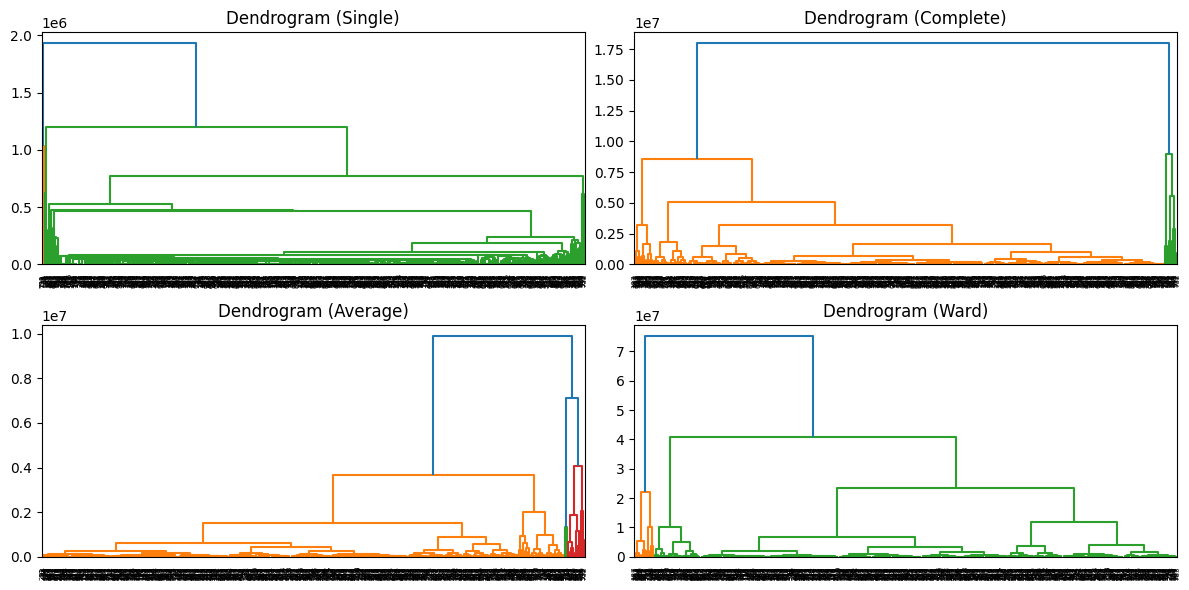

In [ ]:
plt.figure(figsize=(12, 6))
for i, method in enumerate(methods):
    plt.subplot(2, 2, i + 1)
    dendrogram(linkage_matrices[method])
    plt.title(f"Dendrogram ({method.capitalize()})")
plt.tight_layout()
plt.show()

This image shows dendrograms for hierarchical clustering using four different linkage methods: Single, Complete, Average, and Ward. Each dendrogram illustrates how clusters are formed step-by-step by linking individual data points or clusters based on a specific linkage criterion.


Here's a brief overview of each dendrogram type and the linkage methods used:

1. **Single Linkage (Top Left):** This method links clusters based on the minimum distance between points in each cluster. It often leads to a "chaining" effect where clusters are connected by individual points, resulting in elongated shapes. This can capture small clusters but may not be effective for well-separated clusters.

2. **Complete Linkage (Top Right):** Clusters are formed by the maximum distance between points in each cluster. This method produces more compact clusters compared to single linkage, as it requires all points in a cluster to be closer to each other, resulting in rounder, tighter clusters.

3. **Average Linkage (Bottom Left):** Clusters are formed by the average distance between points in each cluster. This method provides a balance between single and complete linkage, creating clusters that are generally well-shaped without the extreme chaining or compactness of the previous methods.

4. **Ward’s Method (Bottom Right):** Ward’s method aims to minimize the variance within each cluster when merging. It is known for producing compact, spherical clusters and is particularly effective when the data has a normal distribution. This method is commonly used in hierarchical clustering as it tends to yield more meaningful clusters for many datasets.

**Interpretation:**

Each plot shows a hierarchy of clusters as represented by vertical lines. The height at which two clusters join indicates the dissimilarity or distance between them. Taller lines represent larger distances and suggest clusters that were merged later in the process. In practical terms, selecting an optimal number of clusters involves cutting the dendrogram at a certain height, allowing you to group data points based on their proximity within that threshold.

## Silhouette Scores for different hierarchical clustering linkage methods.

This code calculates and displays the Silhouette Scores for different hierarchical clustering linkage methods. The Silhouette Score measures how well-separated the clusters are, with higher values indicating better-defined clusters.

**Code Explanation:**

1. **Initialize a Dictionary:** silhouette_scores = {} initializes an empty dictionary to store the Silhouette Scores for each linkage method.

2. **Loop Through Linkage Methods:** For each method in methods, the code:

 1. Creates an AgglomerativeClustering model with n_clusters=2 and the specified linkage method.

 2. Fits the model to df and retrieves the cluster labels using fit_predict.

 3. Calculates the Silhouette Score for the clustering and stores it in silhouette_scores with the method as the key.

3. **Print Results:** Finally, it prints the Silhouette Scores for each linkage method in a formatted way.

**Output:**

The code outputs the Silhouette Score for each linkage method, allowing you to compare the clustering quality across methods.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = {}
for method in methods:
    agg_clustering = AgglomerativeClustering(n_clusters=2, linkage=method)
    labels = agg_clustering.fit_predict(df_cleaned)
    silhouette_scores[method] = silhouette_score(df_cleaned, labels)

print("Silhouette Scores for different linkage methods:")
for method, score in silhouette_scores.items():
    print(f"{method.capitalize()}: {score:}")

Silhouette Scores for different linkage methods:
Single: 0.2339756593744116
Complete: 0.7152136997365216
Average: 0.7180750902463499
Ward: 0.703498821094379


This code performs hierarchical clustering on the dataset using Ward's method and calculates the Silhouette Score to evaluate clustering quality. The higher the Silhouette Score, the better the clustering structure in the data.

**Code Explanation:**

1. **Define Agglomerative Clustering Model:**

  agg_clustering = AgglomerativeClustering(linkage='ward')

   Creates an instance of AgglomerativeClustering using Ward's linkage method, which minimizes the variance within clusters, leading to compact, spherical clusters. By default, n_clusters is not specified, so it needs to be set separately or inferred from the dataset.

2. **Fit and Predict Labels:**

   labels = agg_clustering.fit_predict(df)

   The fit_predict method fits the clustering model to the dataset df and assigns each data point to a cluster. The result, labels, is an array of cluster labels for each data point.

3. **Calculate Silhouette Score:**

   silhouette_scores = silhouette_score(df, labels)

   The silhouette_score function calculates a score to assess the quality of clustering. The score ranges from -1 to 1, with higher values indicating better-defined clusters. It measures how close each point in a cluster is to the points in neighboring clusters.
   
4. **Print the Silhouette Score:**

   print(silhouette_scores)

   Outputs the Silhouette Score, providing insight into how well-separated the clusters are.

In [ ]:
agg_clustering = AgglomerativeClustering(linkage='average')
labels = agg_clustering.fit_predict(df_cleaned)
silhouette_scores = silhouette_score(df_cleaned, labels)
print(silhouette_scores)

0.7180750902463499


In [ ]:
import pandas as pd

data = {
    "Rank": [1, 2, 3, 4, 5],
    "Method": ["Meanshift", "Hierarchical", "K-Means", "K-Medoid", "DBSCAN"],
    "Silhouette Score": [0.98125 , 0.7180750902463499 , 0.6578541152484274 ,  0.656690 , "NaN"],
    "Inertia": [ 0 , 0, 3.086256677223215e+32 , 3.1622400000000006e+17  ,  0.0000],

}

df_clustering_summary = pd.DataFrame(data)
df_clustering_summary.to_excel("Clustering_Methods_Summary.xlsx", index=False)

print("Excel file 'Clustering_Methods_Summary.xlsx' created successfully.")


Excel file 'Clustering_Methods_Summary.xlsx' created successfully.


In [ ]:
summary_table = pd.read_excel("Clustering_Methods_Summary.xlsx")
summary_table


,Rank,Method,Silhouette Score,Inertia
0,1,Meanshift,0.981250,0.000000e+00
1,2,Hierarchical,0.718075,0.000000e+00
2,3,K-Means,0.657854,3.086257e+32
3,4,K-Medoid,0.656690,3.162240e+17
4,5,DBSCAN,NaN,0.000000e+00


1. K-Means Clustering

   Inertia: Provides a measure of how tightly points are grouped within clusters, with lower values indicating more compact clusters.

   Silhouette Score: Measures the separation between clusters, with higher scores (closer to 1) indicating well-defined clusters.

   Result Summary: K-Means is computationally efficient and works well for spherical or uniformly distributed clusters. However, it may struggle if the dataset contains clusters of varying densities or non-spherical shapes.

2. K-Medoids Clustering

   Inertia: Similar to K-Means, but calculated based on medoids (actual data points as cluster centers), making it more robust to outliers.
   
   Silhouette Score: Consistently evaluated for cluster quality.
   
   Result Summary: K-Medoids performs well on datasets with noise and outliers, as it selects actual data points as centers, reducing sensitivity to extreme values. This method may be preferable if there are outliers or a small number of clusters.

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

   Key Parameters: eps (radius for neighborhood search) and min_samples (minimum points to form a dense region).
   
   Silhouette Score: Generally higher for datasets with well-separated clusters.
   
   Result Summary: DBSCAN excels at identifying clusters of varying shapes and densities, while automatically labeling low-density regions as noise (outliers). It is a strong choice if the dataset has clusters of irregular shapes or if noise identification is important. However, its performance depends heavily on parameter tuning.

4. Mean Shift Clustering

   Inertia: Calculated similarly but adjusted for density-based shifts.
   
   Silhouette Score: High scores indicate clear density-based cluster separations.
   
   Result Summary: Mean Shift automatically identifies the number of clusters based on density peaks. This method is advantageous for non-parametric clustering but can be computationally intensive on large datasets. It works best for data with distinct high-density regions.

5. Hierarchical Clustering

   Dendrogram Analysis: Visualizes the hierarchical structure, aiding in choosing the optimal number of clusters.
   
   Inertia and Silhouette Score: Assesses compactness and separation between clusters.
   
   Result Summary: Hierarchical clustering offers a flexible approach that doesn’t require pre-defining the number of clusters. It’s especially useful for understanding cluster relationships and is ideal if you need to visually determine clusters through a dendrogram. However, it can be computationally intensive on large datasets.
